In [7]:
import numpy as np
import matplotlib
from matplotlib import pyplot as plt
%matplotlib inline     
## use `%matplotlib notebook` for interactive figures
# plt.style.use('ggplot')

import pandas as pd
import numpy as np
import pickle
import math
import sklearn
import glob
from tqdm.auto import tqdm
from sklearn.linear_model import LinearRegression
import sys
sys.path.insert(1,'/work/FAC/FGSE/IDYST/tbeucler/default/saranya/causal/parallel_tigramite/')
import func

In [8]:
def give_r2_aligned(filelist=None):
    store_r2train,store_r2test_old,store_r2test_new,store_size = [],[],[],[]
    files = [depickle(obj) for obj in filelist]
    for file in files:
        temp_r2train = r2_score(file['y']['train'],file['mlr'].predict(file['X']['train']))
        temp_r2test_old = r2_score(file['y']['valid']+file['y']['test'],file['mlr'].predict(file['X']['valid']+file['X']['test']))
        temp_r2test_new = r2_score(file['y']['newtest'],file['mlr'].predict(file['X']['newtest']))
        temp = np.asarray([list(obj) for obj in file['X']['train']]).shape[1]
        store_r2train.append(temp_r2train)
        store_r2test_old.append(temp_r2test_old)
        store_r2test_new.append(temp_r2test_new)
        store_size.append(temp)
    storedict_pcstable = {'r2_train':store_r2train,'r2_test_old':store_r2test_old,'r2_test_new':store_r2test_new,'size':store_size}
    del store_r2train,store_r2test_old,store_r2test_new,store_size
    return storedict_pcstable

In [9]:
from sklearn.model_selection import RandomizedSearchCV
import itertools
from sklearn.ensemble import RandomForestRegressor

def fit_rf(random_grid=None,estimator=None,X=None,y=None):
    rf = RandomForestRegressor()
    rf_random = RandomizedSearchCV(estimator=rf,param_distributions=random_grid,n_iter=50,cv=3,verbose=2,random_state=42,n_jobs=-1)
    rf_random.fit(X,y)
    return rf_random

n_estimators = [int(x) for x in np.linspace(100,500,5)]
max_features = ['auto']
max_depth = [int(x) for x in np.linspace(10,110,6)]
#max_depth.append(None)
min_samples_split = [int(x) for x in np.linspace(20,120,6)]
min_samples_leaf = [int(x) for x in np.linspace(20,120,6)]
bootstrap = [True]

random_grid = {'n_estimators':n_estimators,
               'max_features':max_features,
               'max_depth':max_depth,
               'min_samples_split':min_samples_split,
               'min_samples_leaf':min_samples_leaf,
               'bootstrap':bootstrap}
print(random_grid)

{'n_estimators': [100, 200, 300, 400, 500], 'max_features': ['auto'], 'max_depth': [10, 30, 50, 70, 90, 110], 'min_samples_split': [20, 40, 60, 80, 100, 120], 'min_samples_leaf': [20, 40, 60, 80, 100, 120], 'bootstrap': [True]}


In [10]:
(glob.glob('./store/lag/12348/*8_24*precip*.obj.*'))[0].split('.')[-1]

'830'

In [ ]:
files = sorted((glob.glob('./store/lag/12348/*8_24*precip*.obj.*')))
numlinks = [file.split('.')[-1] for file in files]
#pc_alphaname = ['1.5e-05','1.5e-06','1.5e-07','1e-05','1e-06','1e-07']
seedname=12348
for ind, obj in enumerate(files):
    file = func.depickle(obj)
    rf_mdl = fit_rf(random_grid,RandomForestRegressor(),file['X']['train'],file['y']['train'])
    func.save_to_pickle(loc='/work/FAC/FGSE/IDYST/tbeucler/default/saranya/causal/causal_notebooks/climateinformatics_revision1/store/lag_rf/lagrf_8-24_precip.obj.'+\
                        numlinks[ind]+'.'+str(seedname),var=rf_mdl)

Fitting 3 folds for each of 50 candidates, totalling 150 fits
[CV] END bootstrap=True, max_depth=50, max_features=auto, min_samples_leaf=60, min_samples_split=20, n_estimators=400; total time=   7.0s
[CV] END bootstrap=True, max_depth=50, max_features=auto, min_samples_leaf=60, min_samples_split=20, n_estimators=400; total time=   6.9s
[CV] END bootstrap=True, max_depth=50, max_features=auto, min_samples_leaf=60, min_samples_split=20, n_estimators=400; total time=   7.0s
[CV] END bootstrap=True, max_depth=70, max_features=auto, min_samples_leaf=20, min_samples_split=40, n_estimators=400; total time=   9.2s
[CV] END bootstrap=True, max_depth=70, max_features=auto, min_samples_leaf=20, min_samples_split=40, n_estimators=400; total time=   9.0s
[CV] END bootstrap=True, max_depth=70, max_features=auto, min_samples_leaf=20, min_samples_split=40, n_estimators=400; total time=   9.2s
[CV] END bootstrap=True, max_depth=90, max_features=auto, min_samples_leaf=20, min_samples_split=60, n_estimat

In [11]:
files = sorted(glob.glob('../parallel_tigramite/newdata/pcstablewpac_aligned_8-24_pmin*'))[-6:]
pc_alphaname = ['1.5e-05','1.5e-06','1.5e-07','1e-05','1e-06','1e-07']
seedname=12348
for ind, obj in enumerate(files):
    file = func.depickle(obj)
    rf_mdl = fit_rf(random_grid,RandomForestRegressor(),file['X']['train'],file['y']['train'])
    func.save_to_pickle(loc='/work/FAC/FGSE/IDYST/tbeucler/default/saranya/causal/parallel_tigramite/newdata/rf/rfmodels_8-24_pmin.obj.'+\
                        pc_alphaname[ind]+'.'+str(seedname),var=rf_mdl)

Fitting 3 folds for each of 50 candidates, totalling 150 fits
[CV] END bootstrap=True, max_depth=50, max_features=auto, min_samples_leaf=60, min_samples_split=20, n_estimators=400; total time=   8.0s
[CV] END bootstrap=True, max_depth=50, max_features=auto, min_samples_leaf=60, min_samples_split=20, n_estimators=400; total time=   8.2s
[CV] END bootstrap=True, max_depth=50, max_features=auto, min_samples_leaf=60, min_samples_split=20, n_estimators=400; total time=   8.1s
[CV] END bootstrap=True, max_depth=70, max_features=auto, min_samples_leaf=20, min_samples_split=40, n_estimators=400; total time=   9.9s
[CV] END bootstrap=True, max_depth=70, max_features=auto, min_samples_leaf=20, min_samples_split=40, n_estimators=400; total time=  10.3s
[CV] END bootstrap=True, max_depth=70, max_features=auto, min_samples_leaf=20, min_samples_split=40, n_estimators=400; total time=  10.1s
[CV] END bootstrap=True, max_depth=90, max_features=auto, min_samples_leaf=20, min_samples_split=60, n_estimat

In [12]:
files = sorted(glob.glob('../parallel_tigramite/newdata/pcstablewpac_aligned_8-24_v10*'))[-6:]
pc_alphaname = ['1.5e-05','1.5e-06','1.5e-07','1e-05','1e-06','1e-07']
seedname=12348
for ind, obj in enumerate(files):
    file = func.depickle(obj)
    rf_mdl = fit_rf(random_grid,RandomForestRegressor(),file['X']['train'],file['y']['train'])
    func.save_to_pickle(loc='/work/FAC/FGSE/IDYST/tbeucler/default/saranya/causal/parallel_tigramite/newdata/rf/rfmodels_8-24_v10.obj.'+\
                        pc_alphaname[ind]+'.'+str(seedname),var=rf_mdl)

Fitting 3 folds for each of 50 candidates, totalling 150 fits
[CV] END bootstrap=True, max_depth=50, max_features=auto, min_samples_leaf=60, min_samples_split=20, n_estimators=400; total time=   9.4s
[CV] END bootstrap=True, max_depth=50, max_features=auto, min_samples_leaf=60, min_samples_split=20, n_estimators=400; total time=   9.6s
[CV] END bootstrap=True, max_depth=50, max_features=auto, min_samples_leaf=60, min_samples_split=20, n_estimators=400; total time=   9.4s
[CV] END bootstrap=True, max_depth=70, max_features=auto, min_samples_leaf=20, min_samples_split=40, n_estimators=400; total time=  11.8s
[CV] END bootstrap=True, max_depth=70, max_features=auto, min_samples_leaf=20, min_samples_split=40, n_estimators=400; total time=  12.0s
[CV] END bootstrap=True, max_depth=70, max_features=auto, min_samples_leaf=20, min_samples_split=40, n_estimators=400; total time=  11.8s
[CV] END bootstrap=True, max_depth=90, max_features=auto, min_samples_leaf=20, min_samples_split=60, n_estimat

In [11]:
rfmodel = depickle('../parallel_tigramite/newdata/rf/rfmodels_0.001_12348')

In [26]:
from sklearn.metrics import r2_score,mean_squared_error
pc_alpha=0.1
filezz = depickle(sorted(glob.glob('../parallel_tigramite/newdata/pcstablewpac_aligned_8-24_pmin*'))[2])
#sorted(glob.glob('./pickleddatawp/12348/*pmin*.obj.'+str(pc_alpha)+\
#                                '*.12348'))[5::-1]+sorted(glob.glob('./pickleddata2/12348/*wpac_precip*.obj.'+str(pc_alpha)+'*0.01.12348'))[6:]

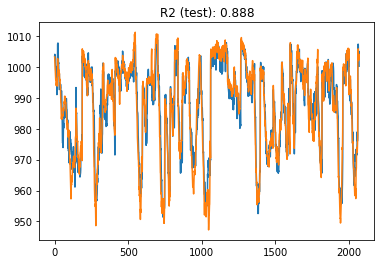

In [28]:
plt.plot(rfmodel.predict(filezz['X']['newtest']))
plt.plot((filezz['y']['newtest']))
plt.title(f"R2 (test): {np.round(r2_score(filezz['y']['newtest'],rfmodel.predict(filezz['X']['newtest'])),decimals=3)}")
plt.show()

In [56]:
store_r2train = []
for ind,files in tqdm(enumerate(sorted(glob.glob('../parallel_tigramite/data/pcstablewpac_aligned_8-24_pmin*')))):
    #enumerate([0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8])):
    #filelist = sorted(glob.glob('./combinedscript/pickleddata2/12348/*pmin*.obj.0.2.*.12348'))
    #filelistt = sorted(glob.glob('/media/saranya/DAEA17D6EA17ADAF/Data/Research_2023/2023/parallel_tigramite/data/pcstablewpac_aligned_8-24_pmin*'))
    file = depickle(files)#[depickle(obj) for obj in filelistt]
    temp_r2train = r2_score(file['y']['train'],store_models[ind].predict(file['X']['train']))
    temp_r2test = r2_score(file['y']['valid']+file['y']['test'],
                            store_models[ind].predict(file['X']['valid']+file['X']['test']))
    store_r2train.append(temp_r2train)
    store_r2test.append(temp_r2test)

0it [00:00, ?it/s]

In [63]:
depickle(filelist[0])['y']['valid']+depickle(filelist[0])['y']['test']

[-999.0,
 -999.0,
 -999.0,
 -999.0,
 -999.0,
 -999.0,
 -999.0,
 -999.0,
 -999.0,
 -999.0,
 -999.0,
 -999.0,
 -999.0,
 -999.0,
 -999.0,
 -999.0,
 -999.0,
 -999.0,
 -999.0,
 -999.0,
 -999.0,
 -999.0,
 -999.0,
 -999.0,
 -999.0,
 -999.0,
 -999.0,
 -999.0,
 -999.0,
 -999.0,
 -999.0,
 -999.0,
 -999.0,
 -999.0,
 -999.0,
 -999.0,
 -999.0,
 -999.0,
 -999.0,
 -999.0,
 -999.0,
 -999.0,
 -999.0,
 -999.0,
 -999.0,
 -999.0,
 -999.0,
 -999.0,
 -999.0,
 -999.0,
 -999.0,
 -999.0,
 -999.0,
 -999.0,
 -999.0,
 -999.0,
 -999.0,
 -999.0,
 -999.0,
 -999.0,
 -999.0,
 -999.0,
 -999.0,
 -999.0,
 -999.0,
 -999.0,
 -999.0,
 -999.0,
 -999.0,
 -999.0,
 -999.0,
 1002.680625,
 1003.029375,
 1004.529375,
 1003.09375,
 1001.345625,
 1001.6875,
 1003.274375,
 1002.103125,
 999.995625,
 999.99375,
 1000.19625,
 999.623125,
 996.655625,
 996.84375,
 996.183125,
 994.864375,
 993.104375,
 991.57625,
 991.57125,
 990.67625,
 987.436875,
 986.899375,
 986.7775,
 987.4025,
 988.46,
 992.19125,
 992.154375,
 991.41375,
 987.96

In [36]:
from sklearn.metrics import r2_score,mean_squared_error
store_r2train,store_r2test,store_size = [],[],[]
for pc_alpha in tqdm([0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8]):
    #filelist = sorted(glob.glob('./combinedscript/pickleddata2/12348/*pmin*.obj.0.2.*.12348'))
    filelistt =sorted(glob.glob('./pickleddatawp/12348/*pmin*.obj.'+str(pc_alpha)+\
                                '*.12348'))[5::-1]+sorted(glob.glob('./pickleddata2/12348/*wpac_precip*.obj.'+str(pc_alpha)+'*0.01.12348'))[6:]
    files = [depickle(obj) for obj in filelistt]
    temp_r2train = [r2_score(file['y']['train'],file['mlr'].predict(file['X']['train'])) for file in files]
    temp_r2test = [r2_score(file['y']['valid']+file['y']['test'],\
                            file['mlr'].predict(file['X']['valid']+file['X']['test'])) for file in files]
    temp = [np.asarray([list(obj) for obj in file['X']['train']]).shape[1] for file in files]
    store_r2train.append(temp_r2train)
    store_r2test.append(temp_r2test)
    store_size.append(temp)
storedict_pcmci = {'r2_train':store_r2train,'r2_test':store_r2test,'size':store_size}
del store_r2train,store_r2test,store_size

100%|█████████████████████████████████████████████████████| 8/8 [00:02<00:00,  2.99it/s]


# todelete

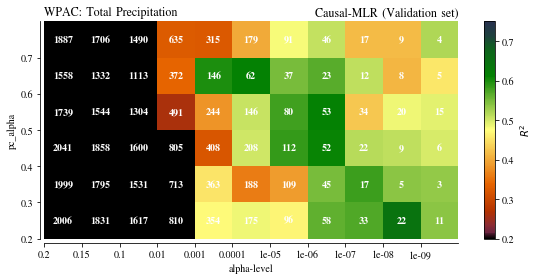

In [47]:
import matplotlib
import cmaps
matplotlib.rcParams['font.sans-serif'] = "Norasi"
matplotlib.rcParams['font.family'] = "sans-serif"

vmax=0.75#(pmin) 1 #(vmin) 0.95 
vmin=0.20#(pmin) 0.85 #(vmin) 0.75
fig,ax = plt.subplots(1,1,figsize=(8,4))
img = ax.pcolormesh(np.asarray(storedict_pcmci['r2_test']),cmap=cmaps.vegetation_ClarkU,vmin=vmin,vmax=vmax,label='$R^2$')
for y in range(np.asarray(storedict_pcmci['size']).shape[0]):
    for x in range(np.asarray(storedict_pcmci['size']).shape[1]):
        plt.text(x + 0.5, y + 0.5, '%.0f' % np.asarray(storedict_pcmci['size'])[y, x],
                 horizontalalignment='center',
                 verticalalignment='center',color='white',fontweight='semibold'
                 )
        
ax.set_xticks(np.linspace(0,10,11))
ax.set_xticklabels([0.2,0.15,0.1,0.01,1e-3,1e-4,1e-5,1e-6,1e-7,1e-8,1e-9])
ax.set_yticks(np.linspace(0,5,6))
ax.set_yticklabels([0.2,0.3,0.4,0.5,0.6,0.7])
ax.set_xlabel('alpha-level')
ax.set_ylabel('pc_alpha')
ax.set_title('WPAC: Total Precipitation',loc='left')
ax.set_title('Causal-MLR (Validation set)',loc='right')
cbar = plt.colorbar(img,label='$R^2$')
#cbar.set_ticks([100,200,300,400,500,600,700,800,900,1000,1200,1400,1600,1800,2000])
ax.spines.left.set_position(('outward', 4))
ax.spines.bottom.set_position(('outward', 4))
ax.spines.right.set_visible(False)
ax.spines.top.set_visible(False)
plt.tight_layout()
plt.savefig('/home/saranya/Downloads/plots_output/2d_wpacprecip_new.png',dpi=400,facecolor='w')
plt.show()

In [18]:
sorted(glob.glob('./pickleddata_random/12348/*pmin*'))

['./pickleddata_random/12348/randomwpac_pmin.obj.010.0',
 './pickleddata_random/12348/randomwpac_pmin.obj.020.0',
 './pickleddata_random/12348/randomwpac_pmin.obj.030.0',
 './pickleddata_random/12348/randomwpac_pmin.obj.040.0',
 './pickleddata_random/12348/randomwpac_pmin.obj.050.0',
 './pickleddata_random/12348/randomwpac_pmin.obj.060.0',
 './pickleddata_random/12348/randomwpac_pmin.obj.070.0',
 './pickleddata_random/12348/randomwpac_pmin.obj.080.0',
 './pickleddata_random/12348/randomwpac_pmin.obj.090.0',
 './pickleddata_random/12348/randomwpac_pmin.obj.100.0',
 './pickleddata_random/12348/randomwpac_pmin.obj.110.0',
 './pickleddata_random/12348/randomwpac_pmin.obj.120.0',
 './pickleddata_random/12348/randomwpac_pmin.obj.130.0',
 './pickleddata_random/12348/randomwpac_pmin.obj.140.0',
 './pickleddata_random/12348/randomwpac_pmin.obj.150.0',
 './pickleddata_random/12348/randomwpac_pmin.obj.160.0',
 './pickleddata_random/12348/randomwpac_pmin.obj.170.0',
 './pickleddata_random/12348/ra

In [13]:
!ls ./pcstabledata/12348/*wpac_precip

ls: cannot access './pcstabledata/12348/*wpac_precip': No such file or directory


In [4]:
#[0.2,0.1,0.05,0.01,1e-3,1e-4,1e-5,1e-6,1e-7,1e-8]
from sklearn.metrics import r2_score,mean_squared_error
store_r2train,store_r2test,store_size = [],[],[]
for pc_alpha in tqdm([0.2,0.1,0.05,0.01,1e-3,1e-4,1e-5,1e-6,1e-7,1e-8]):
    filelist = sorted(glob.glob('./pcstabledata/*wpac_2_16_pmin*.obj.0.1'))
    files = [depickle(obj) for obj in filelist]
    temp_r2train = [r2_score(file['y']['train'],file['mlr'].predict(file['X']['train'])) for file in files]
    temp_r2test = [r2_score(file['y']['valid']+file['y']['test'],\
                            file['mlr'].predict(file['X']['valid']+file['X']['test'])) for file in files]
    temp = [np.asarray([list(obj) for obj in file['X']['train']]).shape[1] for file in files]
    store_r2train.append(temp_r2train)
    store_r2test.append(temp_r2test)
    store_size.append(temp)
storedict_pcstable = {'r2_train':store_r2train,'r2_test':store_r2test,'size':store_size}
del store_r2train,store_r2test,store_size

store_r2train,store_r2test,store_size = [],[],[]
for pc_alpha in tqdm([0.2,0.1,0.05,0.01,1e-3,1e-4,1e-5,1e-6,1e-7,1e-8]):
    #filelist = sorted(glob.glob('./combinedscript/pickleddata2/12348/*pmin*.obj.0.2.*.12348'))
    filelistt =sorted(glob.glob('./pickleddatawp/12348/*wpac_pmin_2*.obj.0.1.'+str(pc_alpha)+\
                                '*.12348'))[5::-1]+sorted(glob.glob('./pickleddatawp/12348/*wpac_pmin*.obj.0.1.'+str(pc_alpha)+'*.12348'))[6:]
    files = [depickle(obj) for obj in filelistt]
    temp_r2train = [r2_score(file['y']['train'],file['mlr'].predict(file['X']['train'])) for file in files]
    temp_r2test = [r2_score(file['y']['valid']+file['y']['test'],\
                            file['mlr'].predict(file['X']['valid']+file['X']['test'])) for file in files]
    temp = [np.asarray([list(obj) for obj in file['X']['train']]).shape[1] for file in files]
    store_r2train.append(temp_r2train)
    store_r2test.append(temp_r2test)
    store_size.append(temp)
storedict_pcmci = {'r2_train':store_r2train,'r2_test':store_r2test,'size':store_size}
del store_r2train,store_r2test,store_size

#store_r2train,store_r2test,store_size = [],[],[]
fileslist = glob.glob('./pickleddata_lag/12348/*wpacnew_2_16_pmin.obj*')[5::-1]+glob.glob('./pickleddata_lag/12348/*wpacnew_2_16_pmin.obj*')[6:]
files = [depickle(obj) for obj in fileslist]
temp_r2train = [r2_score(file['y']['train'],file['mlr'].predict(file['X']['train'])) for file in files]
temp_r2test = [r2_score(file['y']['valid']+file['y']['test'],file['mlr'].predict(file['X']['valid']+file['X']['test'])) for file in files]
temp = [np.asarray([list(obj) for obj in file['X']['train']]).shape[1] for file in files]
storedict_lagged = {'r2_train':temp_r2train,'r2_test':temp_r2test,'size':temp}

100%|████████████████████████████████████████████████████████████████████████████████| 10/10 [00:04<00:00,  2.30it/s]


In [5]:
random_files = sorted(glob.glob('./pickleddata_random/12348/*wpac*_2_16_pmin*'))
store_r2train,store_r2test,store_size = [],[],[]
for pc_alpha in tqdm(range(len(random_files))):
    #filelist = sorted(glob.glob('./combinedscript/pickleddata2/12348/*pmin*.obj.0.2.*.12348'))
    files = [depickle(obj) for obj in random_files]
    temp_r2train = [r2_score(file['y']['train'],file['mlr'].predict(file['X']['train'])) for file in files]
    temp_r2test = [r2_score(file['y']['valid']+file['y']['test'],\
                            file['mlr'].predict(file['X']['valid']+file['X']['test'])) for file in files]
    temp = [np.asarray([list(obj) for obj in file['X']['train']]).shape[1] for file in files]
    store_r2train.append(temp_r2train)
    store_r2test.append(temp_r2test)
    store_size.append(temp)
storedict_random = {'r2_train':store_r2train,'r2_test':store_r2test,'size':store_size}
del store_r2train,store_r2test,store_size

100%|████████████████████████████████████████████████████████████████████████████| 100/100 [1:22:16<00:00, 49.37s/it]


In [6]:
storedict_pcmci

{'r2_train': [[1.0],
  [0.9993276963728867, 0.997863718756942],
  [],
  [0.9886268116113167],
  [0.9850419891294203],
  [0.9831662241458728],
  [0.9798065274192633],
  [0.9796719427873931],
  [0.9788203533768092],
  [0.9784036341542246]],
 'r2_test': [[-1.387114004545047],
  [0.5821854834378898, 0.8586125630085217],
  [],
  [0.9639616921853467],
  [0.965423867599155],
  [0.9669820831010317],
  [0.9682581133515848],
  [0.9686433201716251],
  [0.9674822715482171],
  [0.9673846031217926]],
 'size': [[1313], [1127, 916], [], [281], [110], [58], [23], [16], [8], [7]]}

In [35]:
precip_pcmci=storedict_pcmci
precip_lagged=storedict_lagged
precip_random=storedict_random
precip_pcstab=storedict_pcstable

In [40]:
precip_random

{'r2_train': [[0.5253559298630675,
   0.9151102805169355,
   1.0,
   0.898211790042639,
   0.921757754096349,
   0.9326724287749522,
   0.9460688787232575,
   0.9399779977720697,
   0.9450897791626722,
   0.9539415300927899,
   0.9641944022613896,
   0.954505093131985,
   0.980771090110182,
   0.9788957952597002,
   0.9783130057884333,
   0.9790089653431768,
   0.986167857526295,
   0.9827944032779884,
   0.9840977644165302,
   0.6363385700881858,
   0.9879607651638648,
   0.9866622989218614,
   0.9970599174969051,
   0.9976467248138032,
   0.9998024739217065,
   1.0,
   1.0,
   1.0,
   1.0,
   1.0,
   1.0,
   1.0,
   1.0,
   1.0,
   1.0,
   1.0,
   1.0,
   0.7065414590375672,
   1.0,
   1.0,
   1.0,
   1.0,
   1.0,
   1.0,
   0.7384390649811818,
   1.0,
   1.0,
   1.0,
   1.0,
   1.0,
   1.0,
   1.0,
   1.0,
   1.0,
   1.0,
   0.7923191651148441,
   1.0,
   1.0,
   1.0,
   1.0,
   1.0,
   1.0,
   1.0,
   1.0,
   1.0,
   1.0,
   1.0,
   1.0,
   1.0,
   1.0,
   1.0,
   0.815247663200685

In [33]:
np.asarray(storedict_pcmci['size'][0])

array([2346, 2095, 1769,  833,  387,  135])

In [6]:
pc_alpha=[0.2,0.1,0.05,0.01,1e-3,1e-4,1e-5,1e-6,1e-7,1e-8]
alpha_level = [0.2,0.15,0.1,0.01,1e-3,1e-4,1e-5,1e-6,1e-7,1e-8,1e-9]

/tmp/ipykernel_3671530/969929979.py:6: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  plt.scatter(np.asarray(storedict_pcmci['size'])[:,:].flatten(),np.asarray(storedict_pcmci['r2_train'])[:,:].flatten(),\


IndexError: too many indices for array: array is 1-dimensional, but 2 were indexed

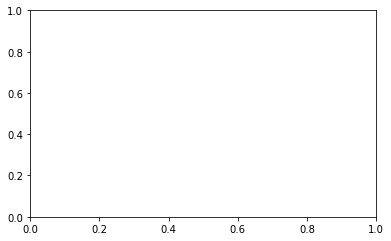

In [8]:
import matplotlib
matplotlib.rcParams['font.sans-serif'] = "Norasi"
matplotlib.rcParams['font.family'] = "sans-serif"

fig,ax = plt.subplots(1,1,figsize=(8-1.8,5-1.2))
plt.scatter(np.asarray(storedict_pcmci['size'])[:,:].flatten(),np.asarray(storedict_pcmci['r2_train'])[:,:].flatten(),\
            s=20,label='Training (M-PCMCI)',edgecolor='k',alpha=0.6)
plt.scatter(np.asarray(storedict_pcmci['size'])[:,:].flatten(),np.asarray(storedict_pcmci['r2_test'])[:,:].flatten(),\
            s=20,label='Validation (M-PCMCI)',edgecolor='k',alpha=0.6)
plt.scatter(np.asarray(storedict_pcstable['size']).flatten(),np.asarray(storedict_pcstable['r2_train']).flatten(),\
            s=30,label='pc-stable (Train)',edgecolor='k',marker='s',color='g')
plt.scatter(np.asarray(storedict_pcstable['size']).flatten(),np.asarray(storedict_pcstable['r2_test']).flatten(),\
            s=30,label='pc-stable (Valid)',edgecolor='k',marker='s',color='#d7f2ae')

#plt.scatter((storedict_random['size'])[0],storedict_random['r2_train'][0],s=20,label='Training (Random)',edgecolor='k',alpha=0.6,c='r')
#plt.scatter((storedict_random['size'])[0],storedict_random['r2_test'][0],s=20,label='Validation (Random)',edgecolor='k',alpha=0.6,c='m')


#plt.scatter(np.asarray(storedict_pcmci0_5['size'][5:]).flatten(),np.asarray(storedict_pcmci0_5['r2_test'][5:]).flatten(),\
#            s=30,label='pcmci (0.5,Valid)',edgecolor='k',marker='s',color='gray')

ax.set_ylabel('$\it{R^{2}}$',size=11)
ax.set_xlabel('Number of Inputs',size=11)
ax.legend(loc=4,ncol=2,prop={'size':8})
ax.grid(alpha=0.2,lw=1.5,ls='--')
ax.set_title(f'$r^2$, Precip',loc='left')
ax.set_title('WPAC',loc='right')
#ax.set_xlim(0,1100)
ax.set_xlim(0,1050)
ax.set_ylim(0.80,1)
# Spines
ax.spines.left.set_position(('outward', 10))
ax.spines.bottom.set_position(('outward', 10))
ax.spines.right.set_visible(False)
ax.spines.top.set_visible(False)
plt.tight_layout()
#plt.savefig('/home/saranya/Downloads/plots_output/fig2_r2_large_precipzoom.png',dpi=400,facecolor='w')
plt.show()

In [ ]:
import matplotlib
matplotlib.rcParams['font.sans-serif'] = "Norasi"
matplotlib.rcParams['font.family'] = "sans-serif"

fig,ax = plt.subplots(1,1,figsize=(8-1.8,5-1.2))
plt.scatter(np.asarray(storedict_pcmci['size'])[:7,:].flatten(),np.asarray(storedict_pcmci['r2_train'])[:7,:].flatten(),\
            s=20,label='Training (M-PCMCI)',edgecolor='k',alpha=0.6)
plt.scatter(np.asarray(storedict_pcmci['size'])[:7,:].flatten(),np.asarray(storedict_pcmci['r2_test'])[:7,:].flatten(),\
            s=20,label='Validation (M-PCMCI)',edgecolor='k',alpha=0.6)
#plt.scatter(np.asarray(storedict_pcstable['size']).flatten(),np.asarray(storedict_pcstable['r2_train']).flatten(),\
#            s=30,label='pc-stable (Train)',edgecolor='k',marker='s',color='g')
#plt.scatter(np.asarray(storedict_pcstable['size']).flatten(),np.asarray(storedict_pcstable['r2_test']).flatten(),\
#            s=30,label='pc-stable (Valid)',edgecolor='k',marker='s',color='#d7f2ae')

plt.scatter((storedict_random['size'])[0],storedict_random['r2_train'][0],s=20,label='Training (Random)',edgecolor='k',alpha=0.6,c='r')
plt.scatter((storedict_random['size'])[0],storedict_random['r2_test'][0],s=20,label='Validation (Random)',edgecolor='k',alpha=0.6,c='m')


#plt.scatter(np.asarray(storedict_pcmci0_5['size'][5:]).flatten(),np.asarray(storedict_pcmci0_5['r2_test'][5:]).flatten(),\
#            s=30,label='pcmci (0.5,Valid)',edgecolor='k',marker='s',color='gray')

ax.set_ylabel('$\it{R^{2}}$',size=11)
ax.set_xlabel('Number of Inputs',size=11)
ax.legend(loc=4,ncol=2,prop={'size':8})
ax.grid(alpha=0.2,lw=1.5,ls='--')
ax.set_title(f'$r^2$, Precip',loc='left')
ax.set_title('WPAC',loc='right')
#ax.set_xlim(0,1100)
ax.set_xlim(0,1050)
ax.set_ylim(0.80,1)
# Spines
ax.spines.left.set_position(('outward', 10))
ax.spines.bottom.set_position(('outward', 10))
ax.spines.right.set_visible(False)
ax.spines.top.set_visible(False)
plt.tight_layout()
#plt.savefig('/home/saranya/Downloads/plots_output/fig2_r2_large_precipzoom.png',dpi=400,facecolor='w')
plt.show()

In [ ]:
import matplotlib
matplotlib.rcParams['font.sans-serif'] = "Norasi"
matplotlib.rcParams['font.family'] = "sans-serif"

fig,ax = plt.subplots(1,1,figsize=(8-1.8,5-1.2))
plt.scatter(np.asarray(storedict_pcmci['size'])[:7,:].flatten(),np.asarray(storedict_pcmci['r2_train'])[:7,:].flatten(),\
            s=20,label='Training (M-PCMCI)',edgecolor='k',alpha=0.6)
plt.scatter(np.asarray(storedict_pcmci['size'])[:7,:].flatten(),np.asarray(storedict_pcmci['r2_test'])[:7,:].flatten(),\
            s=20,label='Validation (M-PCMCI)',edgecolor='k',alpha=0.6)
#plt.scatter(np.asarray(storedict_pcstable['size']).flatten(),np.asarray(storedict_pcstable['r2_train']).flatten(),\
#            s=30,label='pc-stable (Train)',edgecolor='k',marker='s',color='g')
#plt.scatter(np.asarray(storedict_pcstable['size']).flatten(),np.asarray(storedict_pcstable['r2_test']).flatten(),\
#            s=30,label='pc-stable (Valid)',edgecolor='k',marker='s',color='#d7f2ae')

plt.scatter((storedict_lagged['size'])[0],storedict_lagged['r2_train'][0],s=20,label='Training (lagged)',edgecolor='k',alpha=0.6,c='r')
plt.scatter((storedict_lagged['size'])[0],storedict_lagged['r2_test'][0],s=20,label='Validation (lagged)',edgecolor='k',alpha=0.6,c='m')


#plt.scatter(np.asarray(storedict_pcmci0_5['size'][5:]).flatten(),np.asarray(storedict_pcmci0_5['r2_test'][5:]).flatten(),\
#            s=30,label='pcmci (0.5,Valid)',edgecolor='k',marker='s',color='gray')

ax.set_ylabel('$\it{R^{2}}$',size=11)
ax.set_xlabel('Number of Inputs',size=11)
ax.legend(loc=4,ncol=2,prop={'size':8})
ax.grid(alpha=0.2,lw=1.5,ls='--')
ax.set_title(f'$r^2$, Precip',loc='left')
ax.set_title('WPAC',loc='right')
#ax.set_xlim(0,1100)
ax.set_xlim(0,1050)
ax.set_ylim(0.80,1)
# Spines
ax.spines.left.set_position(('outward', 10))
ax.spines.bottom.set_position(('outward', 10))
ax.spines.right.set_visible(False)
ax.spines.top.set_visible(False)
plt.tight_layout()
#plt.savefig('/home/saranya/Downloads/plots_output/fig2_r2_large_precipzoom.png',dpi=400,facecolor='w')
plt.show()

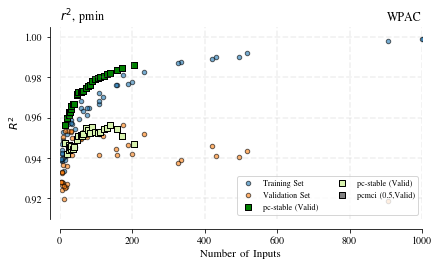

In [53]:
import matplotlib
matplotlib.rcParams['font.sans-serif'] = "Norasi"
matplotlib.rcParams['font.family'] = "sans-serif"

fig,ax = plt.subplots(1,1,figsize=(8-1.8,5-1.2))
plt.scatter(np.asarray(storedict_pcmci['size'])[:7,:].flatten(),np.asarray(storedict_pcmci['r2_train'])[:7,:].flatten(),\
            s=20,label='Training Set',edgecolor='k',alpha=0.6)
plt.scatter(np.asarray(storedict_pcmci['size'])[:7,:].flatten(),np.asarray(storedict_pcmci['r2_test'])[:7,:].flatten(),\
            s=20,label='Validation Set',edgecolor='k',alpha=0.6)
plt.scatter(np.asarray(storedict_pcstable['size']).flatten(),np.asarray(storedict_pcstable['r2_train']).flatten(),\
            s=30,label='pc-stable (Valid)',edgecolor='k',marker='s',color='g')
plt.scatter(np.asarray(storedict_pcstable['size']).flatten(),np.asarray(storedict_pcstable['r2_test']).flatten(),\
            s=30,label='pc-stable (Valid)',edgecolor='k',marker='s',color='#d7f2ae')
plt.scatter(np.asarray(storedict_pcmci0_5['size']).flatten(),np.asarray(storedict_pcmci0_5['r2_test']).flatten(),\
            s=30,label='pcmci (0.5,Valid)',edgecolor='k',marker='s',color='gray')

ax.set_ylabel('$\it{R^{2}}$',size=11)
ax.set_xlabel('Number of Inputs',size=11)
ax.legend(loc=4,ncol=2,prop={'size':8})
ax.grid(alpha=0.2,lw=1.5,ls='--')
ax.set_title(f'$r^2$, pmin',loc='left')
ax.set_title('WPAC',loc='right')
#ax.set_xlim(0,1100)
ax.set_xlim(0,1000)
ax.set_ylim(0.91,1.005)
# Spines
ax.spines.left.set_position(('outward', 10))
ax.spines.bottom.set_position(('outward', 10))
ax.spines.right.set_visible(False)
ax.spines.top.set_visible(False)
plt.tight_layout()
plt.savefig('/home/saranya/Downloads/plots_output/fig2_r2_large_pminzoom.png',dpi=400,facecolor='w')
plt.show()

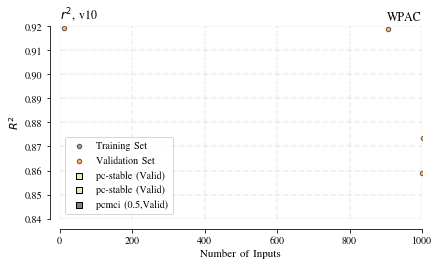

In [49]:
import matplotlib
matplotlib.rcParams['font.sans-serif'] = "Norasi"
matplotlib.rcParams['font.family'] = "sans-serif"

fig,ax = plt.subplots(1,1,figsize=(8-1.8,5-1.2))
plt.scatter(np.asarray(storedict_pcmci['size'])[:7,:].flatten(),np.asarray(storedict_pcmci['r2_train'])[:7,:].flatten(),\
            s=20,label='Training Set',edgecolor='k',alpha=0.6)
plt.scatter(np.asarray(storedict_pcmci['size'])[:7,:].flatten(),np.asarray(storedict_pcmci['r2_test'])[:7,:].flatten(),\
            s=20,label='Validation Set',edgecolor='k',alpha=0.6)
plt.scatter(np.asarray(storedict_pcstable['size']).flatten(),np.asarray(storedict_pcstable['r2_train']).flatten(),\
            s=30,label='pc-stable (Valid)',edgecolor='k',marker='s',color='#d7f2ae')
plt.scatter(np.asarray(storedict_pcstable['size']).flatten(),np.asarray(storedict_pcstable['r2_test']).flatten(),\
            s=30,label='pc-stable (Valid)',edgecolor='k',marker='s',color='#d7f2ae')
plt.scatter(np.asarray(storedict_pcmci0_5['size'][5:]).flatten(),np.asarray(storedict_pcmci0_5['r2_test'][5:]).flatten(),\
            s=30,label='pcmci (0.5,Valid)',edgecolor='k',marker='s',color='gray')

ax.set_ylabel('$\it{R^{2}}$',size=11)
ax.set_xlabel('Number of Inputs',size=11)
ax.legend(loc=3,ncol=1)
ax.grid(alpha=0.2,lw=1.5,ls='--')
ax.set_title(f'$r^2$, v10',loc='left')
ax.set_title('WPAC',loc='right')
#ax.set_xlim(0,1100)
ax.set_xlim(0,1000)
ax.set_ylim(0.84,0.92)
# Spines
ax.spines.left.set_position(('outward', 10))
ax.spines.bottom.set_position(('outward', 10))
ax.spines.right.set_visible(False)
ax.spines.top.set_visible(False)
plt.tight_layout()
#plt.savefig('/home/saranya/Downloads/plots_output/fig2_r2_large_v10zoom.png',dpi=400,facecolor='w')
plt.show()

In [9]:
from numpy import unravel_index
unravel_index(np.argmax(np.asarray(storedict['r2_test']).ravel()), np.asarray(storedict['r2_test']).shape)

(9, 10)

In [10]:
np.asarray(storedict['size'])[:7,:]

array([[2288, 2100, 1888, 1003,  494,  233,  110,   58,   34,   22,    9],
       [1952, 1757, 1514,  719,  391,  214,  104,   47,   26,   24,   20],
       [1861, 1683, 1476,  728,  412,  232,  132,   94,   64,   45,   25],
       [2013, 1808, 1541,  671,  379,  246,  171,  119,   91,   59,   31],
       [2380, 2202, 1996, 1218,  764,  524,  395,  256,  180,  130,   87],
       [2516, 2343, 2122, 1307,  885,  609,  389,  222,  144,   97,   65],
       [2606, 2429, 2230, 1444,  986,  694,  467,  322,  255,  187,  161]])

In [11]:
import cmaps,cmocean,pyart


## You are using the Python ARM Radar Toolkit (Py-ART), an open source
## library for working with weather radar data. Py-ART is partly
## supported by the U.S. Department of Energy as part of the Atmospheric
## Radiation Measurement (ARM) Climate Research Facility, an Office of
## Science user facility.
##
## If you use this software to prepare a publication, please cite:
##
##     JJ Helmus and SM Collis, JORS 2016, doi: 10.5334/jors.119



NameError: name 'w0' is not defined

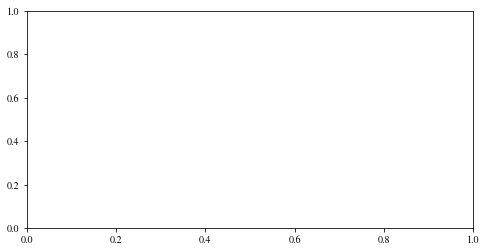

In [12]:
import matplotlib
matplotlib.rcParams['font.sans-serif'] = "Norasi"
matplotlib.rcParams['font.family'] = "sans-serif"

fig,ax = plt.subplots(1,1,figsize=(8,4))
img = ax.pcolormesh(np.asarray(storedict['size']),cmap=cmaps.CBR_set3,vmin=-w0,vmax=2000)
ax.set_xticks(np.linspace(0,10,11))
ax.set_xticklabels([0.2,0.15,0.1,0.01,1e-3,1e-4,1e-5,1e-6,1e-7,1e-8,1e-9])
ax.set_yticks(np.linspace(0,9,10))
ax.set_yticklabels([0.2,0.1,0.05,0.01,1e-3,1e-4,1e-5,1e-6,1e-7,1e-8])
ax.set_xlabel('alpha-level')
ax.set_ylabel('pc_alpha')
ax.set_title('WPAC: Minimum SLP',loc='left')
ax.set_title('Causal-MLR',loc='right')
cbar = plt.colorbar(img)
cbar.set_ticks([100,200,300,400,500,600,700,800,900,1000,1200,1400,1600,1800,2000])
ax.spines.left.set_position(('outward', 4))
ax.spines.bottom.set_position(('outward', 4))
ax.spines.right.set_visible(False)
ax.spines.top.set_visible(False)
plt.tight_layout()
#plt.savefig('/home/saranya/Downloads/plots_output/2d_wpacSLP.png',dpi=400,facecolor='w')
plt.show()

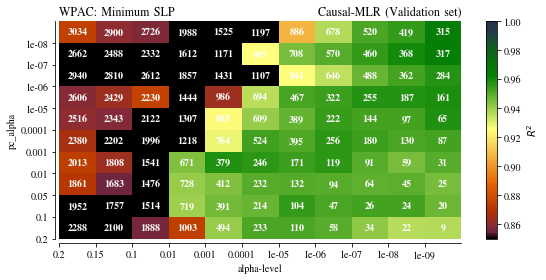

In [13]:
import matplotlib
matplotlib.rcParams['font.sans-serif'] = "Norasi"
matplotlib.rcParams['font.family'] = "sans-serif"

fig,ax = plt.subplots(1,1,figsize=(8,4))
img = ax.pcolormesh(np.asarray(storedict['r2_test']),cmap=cmaps.vegetation_ClarkU,vmin=0.85,vmax=1,label='$R^2$')
for y in range(np.asarray(storedict['size']).shape[0]):
    for x in range(np.asarray(storedict['size']).shape[1]):
        plt.text(x + 0.5, y + 0.5, '%.0f' % np.asarray(storedict['size'])[y, x],
                 horizontalalignment='center',
                 verticalalignment='center',color='white',fontweight='semibold'
                 )
        
ax.set_xticks(np.linspace(0,10,11))
ax.set_xticklabels([0.2,0.15,0.1,0.01,1e-3,1e-4,1e-5,1e-6,1e-7,1e-8,1e-9])
ax.set_yticks(np.linspace(0,9,10))
ax.set_yticklabels([0.2,0.1,0.05,0.01,1e-3,1e-4,1e-5,1e-6,1e-7,1e-8])
ax.set_xlabel('alpha-level')
ax.set_ylabel('pc_alpha')
ax.set_title('WPAC: Minimum SLP',loc='left')
ax.set_title('Causal-MLR (Validation set)',loc='right')
cbar = plt.colorbar(img,label='$R^2$')
#cbar.set_ticks([100,200,300,400,500,600,700,800,900,1000,1200,1400,1600,1800,2000])
ax.spines.left.set_position(('outward', 4))
ax.spines.bottom.set_position(('outward', 4))
ax.spines.right.set_visible(False)
ax.spines.top.set_visible(False)
plt.tight_layout()
plt.savefig('/home/saranya/Downloads/plots_output/2d_wpacSLP_new.png',dpi=400,facecolor='w')
plt.show()

In [14]:
np.asarray(storedict['r2_train'])

array([[1.        , 1.        , 1.        , 0.99874444, 0.99022926,
        0.98257944, 0.9720502 , 0.96475714, 0.95682502, 0.95182043,
        0.94885964],
       [1.        , 1.        , 1.        , 0.99530298, 0.98730815,
        0.97764335, 0.97041437, 0.96414911, 0.96185515, 0.96143937,
        0.9594773 ],
       [1.        , 1.        , 1.        , 0.99535297, 0.98682029,
        0.98008367, 0.97126626, 0.96790916, 0.96650576, 0.96520202,
        0.96057783],
       [1.        , 1.        , 1.        , 0.99522042, 0.98563547,
        0.97839146, 0.97208802, 0.9684795 , 0.96498238, 0.96096474,
        0.95859236],
       [1.        , 1.        , 1.        , 1.        , 0.99688786,
        0.99322431, 0.98972469, 0.98614956, 0.9814689 , 0.97710206,
        0.9733915 ],
       [1.        , 1.        , 1.        , 1.        , 0.99784017,
        0.994206  , 0.98911502, 0.98391542, 0.97892297, 0.97360338,
        0.96693619],
       [1.        , 1.        , 1.        , 1.        , 0.

In [15]:
! ls ./combinedscript/pickleddata4/12348

causalnio_lag_and_links.0.0001.0.0001.12348
causalnio_lag_and_links.0.0001.0.001.12348
causalnio_lag_and_links.0.0001.0.01.12348
causalnio_lag_and_links.0.0001.0.1.12348
causalnio_lag_and_links.0.0001.0.15.12348
causalnio_lag_and_links.0.0001.0.2.12348
causalnio_lag_and_links.0.0001.1e-05.12348
causalnio_lag_and_links.0.0001.1e-06.12348
causalnio_lag_and_links.0.0001.1e-07.12348
causalnio_lag_and_links.0.0001.1e-08.12348
causalnio_lag_and_links.0.0001.1e-09.12348
causalnio_lag_and_links.0.001.0.0001.12348
causalnio_lag_and_links.0.001.0.001.12348
causalnio_lag_and_links.0.001.0.01.12348
causalnio_lag_and_links.0.001.0.1.12348
causalnio_lag_and_links.0.001.0.15.12348
causalnio_lag_and_links.0.001.0.2.12348
causalnio_lag_and_links.0.001.1e-05.12348
causalnio_lag_and_links.0.001.1e-06.12348
causalnio_lag_and_links.0.001.1e-07.12348
causalnio_lag_and_links.0.001.1e-08.12348
causalnio_lag_and_links.0.001.1e-09.12348
causalnio_lag_and_links.0.01.0.0001.12348
causalnio_lag_and_links.0.01.0.00

In [16]:
pmin_trained = [depickle(obj) for obj in sorted(glob.glob('./combinedscript/pickleddata3/12348/*v10*'))]

In [17]:
import pandas as pd
numVAR = pd.DataFrame({'numVAR':[np.asarray(pmin_trained[i]['X']['train']).shape[1] for i in range(20)]})
expINDEX = (numVAR.sort_values(by=['numVAR']).index)

In [18]:
np.asarray(numVAR.sort_values(by=['numVAR']).values).T[0]

array([ 164,  183,  242,  256,  321,  345,  416,  438,  521,  573,  694,
        756,  977, 1126, 1541, 1743, 2254, 2507, 2661, 2786])

In [19]:
expINDEX

Int64Index([19, 13, 18, 12, 17, 11, 16, 10, 15, 9, 14, 0, 1, 2, 3, 4, 5, 6, 7,
            8],
           dtype='int64')

#### R2 score

In [20]:
numVAR.sort_values(by=['numVAR'])

numVAR
19     164
13     183
18     242
12     256
17     321
11     345
16     416
10     438
15     521
9      573
14     694
0      756
1      977
2     1126
3     1541
4     1743
5     2254
6     2507
7     2661
8     2786

In [21]:
from sklearn.metrics import r2_score,mean_squared_error
r2_train = [r2_score(pmin_trained[obj]['y']['train'],\
                               pmin_trained[obj]['mlr'].predict(pmin_trained[obj]['X']['train'])) for obj in expINDEX]
r2_test = [r2_score(pmin_trained[obj]['y']['test'],\
                              pmin_trained[obj]['mlr'].predict(pmin_trained[obj]['X']['test'])) for obj in expINDEX]

<>:11: DeprecationWarning: invalid escape sequence \i
<>:11: DeprecationWarning: invalid escape sequence \i
/tmp/ipykernel_49528/612899311.py:11: DeprecationWarning: invalid escape sequence \i
  ax.set_ylabel('$\it{R^{2}}$',size=11)


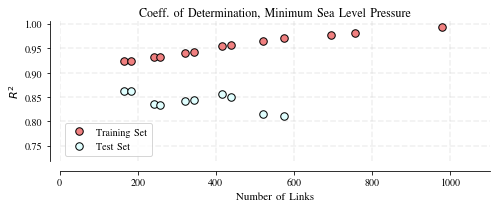

In [22]:
import matplotlib
matplotlib.rcParams['font.sans-serif'] = "Norasi"
matplotlib.rcParams['font.family'] = "sans-serif"

fig,ax = plt.subplots(1,1,figsize=(7,3))
plt.plot(np.asarray(numVAR.sort_values(by=['numVAR']).values),r2_train,label='Training Set',lw=0,marker='o',
        markersize=7.5,mfc='lightcoral',mec='k')
plt.plot(np.asarray(numVAR.sort_values(by=['numVAR']).values),r2_test,label='Test Set',lw=0,marker='o',
        markersize=7.5,mfc='lightcyan',mec='k')
#ax[0].set_xlabel('Time Samples')
ax.set_ylabel('$\it{R^{2}}$',size=11)
ax.set_xlabel('Number of Links',size=11)
ax.legend(loc=3,ncol=1)
ax.grid(alpha=0.2,lw=1.5,ls='--')
ax.set_title(f'Coeff. of Determination, Minimum Sea Level Pressure')
ax.set_xlim(0,1100)
ax.set_ylim(0.72,1.005)
# Spines
ax.spines.left.set_position(('outward', 10))
ax.spines.bottom.set_position(('outward', 10))
ax.spines.right.set_visible(False)
ax.spines.top.set_visible(False)
plt.tight_layout()
#plt.savefig('/home/saranya/Downloads/plots_output/fig2_r2_large.png',dpi=400,facecolor='w')
plt.show()

In [23]:
np.asarray(pmin_trained[19]['y']['train']).shape

(1218,)

In [24]:
r2_score(np.asarray(pmin_trained[19]['y']['test']),\
         np.asarray(pmin_trained[19]['mlr'].predict(pmin_trained[19]['X']['test'])))

0.8630401546843401

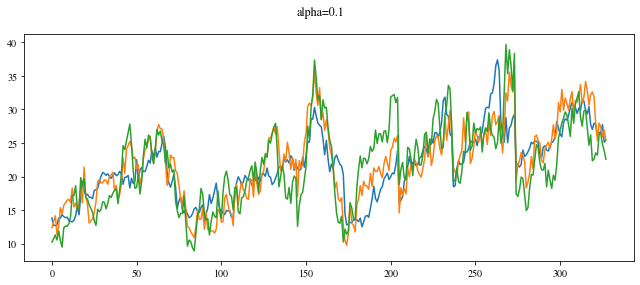

In [25]:
# 0.1
index = 0
alpha = [r'0.1','0.05','0.01','10$^{-3}$','10$^{-4}$','10$^{-5}$',\
                                '10$^{-6}$','10$^{-7}$','10$^{-8}$']
fix = plt.subplots(1,1,figsize=(9,4))
plt.plot(pmin_trained[8]['y']['test'],label='train_truth')
plt.plot(pmin_trained[8]['mlr'].predict(pmin_trained[8]['X']['test']),label='train_pred')
plt.plot(pmin_trained[5]['mlr'].predict(pmin_trained[5]['X']['test']),label='train_pred')
#ax[0].set_xlabel('Time Samples')
ax.set_ylabel('Integrated Precipitation')
ax.legend(loc=1,ncol=2)
ax.grid(alpha=0.2,lw=1.5,ls='--')
#ax.set_title(f'Integrated Precipitation (Train), numlink={len(lag_and_links[index][0])}')
plt.suptitle(f'alpha={alpha[index]}')
plt.tight_layout()
plt.show()

In [26]:
#precipdict = depickle('./combinedscript/pickleddata/p0.01/causalwpac_precip.obj')
#pmindict = depickle('./combinedscript/pickleddata/p0.01/causalwpac_pmin.obj')
#v10dict = depickle('./combinedscript/pickleddata/p0.01/causalwpac_v10.obj')
choose = [4,3,2,1,0,5,6,7,8]
precipdict,pmindict,v10dict,lag_and_links = [],[],[],[]
for i in choose:
    precipdict.append(depickle(sorted(glob.glob('./combinedscript/pickleddata3/*precip*'))[i]))
    pmindict.append(depickle(sorted(glob.glob('./combinedscript/pickleddata3/*pmin*'))[i]))
    v10dict.append(depickle(sorted(glob.glob('./combinedscript/pickleddata3/*v10*'))[i]))
    lag_and_links.append(depickle(sorted(glob.glob('./combinedscript/pickleddata3/*lag_and*'))[i]))
varname = depickle('./combinedscript/pickleddata2/causalwpac_varname')

IndexError: list index out of range

#### Convert links to text

In [27]:
def convert_to_text(obj=None):
    emptylist = []
    for subobj in obj:
        emptylist.append((varname[subobj[0]],subobj[1]))
    return emptylist
def write_to_txt(listloc=None,a_list=None):
    textfile = open(listloc, "w")
    for element in a_list:
        textfile.write(str(element) + "\n")
    textfile.close()

target = ['precip','pmin','v10']
for ind,obj in enumerate(lag_and_links):
    mylist = convert_to_text(obj)
    write_to_txt('./links_'+str(target[ind])+'_0.05.txt',mylist)

In [28]:
precipvars,preciplags =[obj[0] for obj in convert_to_text(lag_and_links[0])],\
[obj[1] for obj in convert_to_text(lag_and_links[0])]
preciplinksDF = pd.DataFrame(data={'varname':precipvars,'lags':preciplags})

IndexError: list index out of range

In [29]:
preciplinksDF

NameError: name 'preciplinksDF' is not defined

#### Plot results

ValueError: x and y must have same first dimension, but have shapes (9,) and (0,)

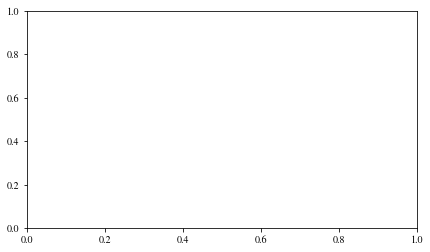

In [30]:
import matplotlib
matplotlib.rcParams['font.sans-serif'] = "Norasi"
matplotlib.rcParams['font.family'] = "sans-serif"

fig,ax = plt.subplots(1,1,figsize=(7,4))
ax.plot(np.linspace(0,8,9),[len(obj[0]) for obj in lag_and_links],lw=2.5,color='k',label='PRECIP')
ax.plot(np.linspace(0,8,9),[len(obj[1]) for obj in lag_and_links],lw=2.5,color='r',label='PMIN')
ax.plot(np.linspace(0,8,9),[len(obj[2]) for obj in lag_and_links],lw=2.5,color='b',label='V10')
ax.grid(alpha=0.2,lw=1.5,ls='--')
plt.xticks([0,1,2,3,4,5,6,7,8], [r'0.1','0.05','0.01','10$^{-3}$','10$^{-4}$','10$^{-5}$',\
                                '10$^{-6}$','10$^{-7}$','10$^{-8}$'], rotation=0,weight = 'normal',\
          fontsize=10)
#plt.title(title,weight = 'normal',fontsize=12)
plt.xlabel('Alpha Level',weight = 'normal',fontsize=12)
plt.ylabel('Number of Links',weight = 'normal',fontsize=12)
plt.legend(loc=1)
plt.show()

IndexError: list index out of range

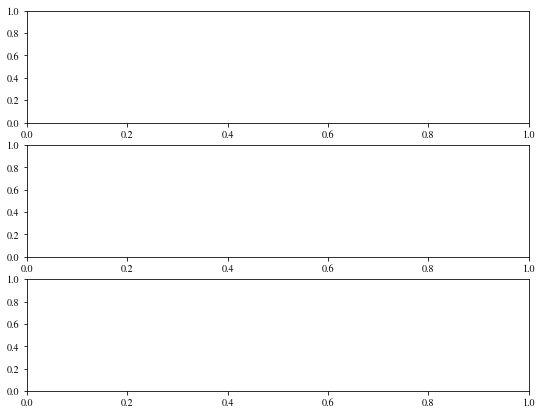

In [31]:
# 0.1
index = 0
alpha = [r'0.1','0.05','0.01','10$^{-3}$','10$^{-4}$','10$^{-5}$',\
                                '10$^{-6}$','10$^{-7}$','10$^{-8}$']
fig,ax = plt.subplots(3,1,figsize=(9,7))
ax[0].plot(precipdict[index]['y']['train'],label='train_truth')
ax[0].plot(precipdict[index]['mlr'].predict(precipdict[index]['X']['train']),label='train_pred')
#ax[0].set_xlabel('Time Samples')
ax[0].set_ylabel('Integrated Precipitation')
ax[0].legend(loc=1,ncol=2)
ax[0].grid(alpha=0.2,lw=1.5,ls='--')
ax[0].set_title(f'Integrated Precipitation (Train), numlink={len(lag_and_links[index][0])}')
plt.suptitle(f'alpha={alpha[index]}')

ax[1].plot(pmindict[index]['y']['train'],label='train_truth')
ax[1].plot(pmindict[index]['mlr'].predict(pmindict[index]['X']['train']),label='train_pred')
#ax[0].set_xlabel('Time Samples')
ax[1].set_ylabel('Minimum SLP')
ax[1].legend(loc=4,ncol=2)
ax[1].grid(alpha=0.2,lw=1.5,ls='--')
ax[1].set_title(f'Minimum SLP (Train), numlink={len(lag_and_links[index][1])}')

ax[2].plot(v10dict[index]['y']['train'],label='train_truth')
ax[2].plot(v10dict[index]['mlr'].predict(v10dict[index]['X']['train']),label='train_pred')
#ax[0].set_xlabel('Time Samples')
ax[2].set_ylabel('Maximum Surface Wind Speed')
ax[2].legend(loc=2,ncol=2)
ax[2].grid(alpha=0.2,lw=1.5,ls='--')
ax[2].set_title(f'Maximum Surface Wind Speed (Train), numlink={len(lag_and_links[index][2])}')
#plt.savefig('/home/saranya/Downloads/plots_output/integratedprecip_valid.png',dpi=400,facecolor='w')
plt.tight_layout()
plt.show()

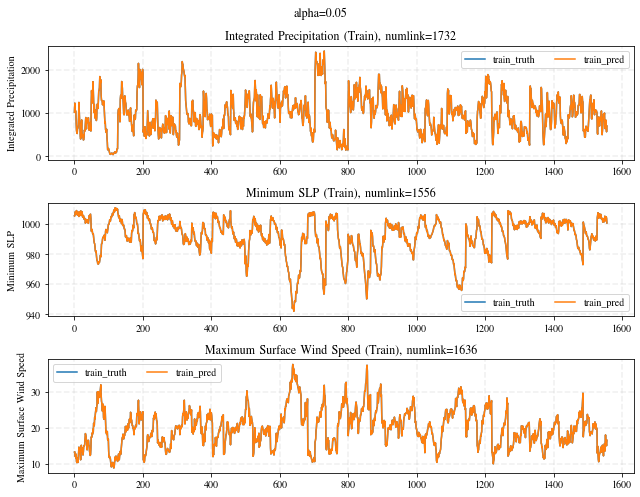

In [41]:

index = 1
alpha = [r'0.1','0.05','0.01','10$^{-3}$','10$^{-4}$','10$^{-5}$',\
                                '10$^{-6}$','10$^{-7}$','10$^{-8}$']
fig,ax = plt.subplots(3,1,figsize=(9,7))
ax[0].plot(precipdict[index]['y']['train'],label='train_truth')
ax[0].plot(precipdict[index]['mlr'].predict(precipdict[index]['X']['train']),label='train_pred')
#ax[0].set_xlabel('Time Samples')
ax[0].set_ylabel('Integrated Precipitation')
ax[0].legend(loc=1,ncol=2)
ax[0].grid(alpha=0.2,lw=1.5,ls='--')
ax[0].set_title(f'Integrated Precipitation (Train), numlink={len(lag_and_links[index][0])}')
plt.suptitle(f'alpha={alpha[index]}')

ax[1].plot(pmindict[index]['y']['train'],label='train_truth')
ax[1].plot(pmindict[index]['mlr'].predict(pmindict[index]['X']['train']),label='train_pred')
#ax[0].set_xlabel('Time Samples')
ax[1].set_ylabel('Minimum SLP')
ax[1].legend(loc=4,ncol=2)
ax[1].grid(alpha=0.2,lw=1.5,ls='--')
ax[1].set_title(f'Minimum SLP (Train), numlink={len(lag_and_links[index][1])}')

ax[2].plot(v10dict[index]['y']['train'],label='train_truth')
ax[2].plot(v10dict[index]['mlr'].predict(v10dict[index]['X']['train']),label='train_pred')
#ax[0].set_xlabel('Time Samples')
ax[2].set_ylabel('Maximum Surface Wind Speed')
ax[2].legend(loc=2,ncol=2)
ax[2].grid(alpha=0.2,lw=1.5,ls='--')
ax[2].set_title(f'Maximum Surface Wind Speed (Train), numlink={len(lag_and_links[index][2])}')
#plt.savefig('/home/saranya/Downloads/plots_output/integratedprecip_valid.png',dpi=400,facecolor='w')
plt.tight_layout()
plt.show()

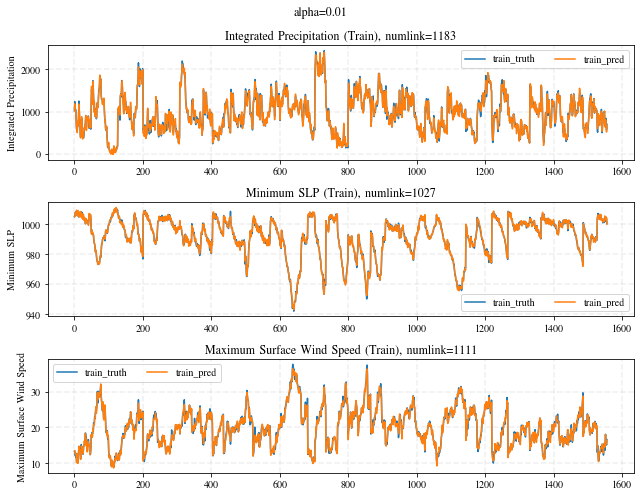

In [42]:

index = 2
alpha = [r'0.1','0.05','0.01','10$^{-3}$','10$^{-4}$','10$^{-5}$',\
                                '10$^{-6}$','10$^{-7}$','10$^{-8}$']
fig,ax = plt.subplots(3,1,figsize=(9,7))
ax[0].plot(precipdict[index]['y']['train'],label='train_truth')
ax[0].plot(precipdict[index]['mlr'].predict(precipdict[index]['X']['train']),label='train_pred')
#ax[0].set_xlabel('Time Samples')
ax[0].set_ylabel('Integrated Precipitation')
ax[0].legend(loc=1,ncol=2)
ax[0].grid(alpha=0.2,lw=1.5,ls='--')
ax[0].set_title(f'Integrated Precipitation (Train), numlink={len(lag_and_links[index][0])}')
plt.suptitle(f'alpha={alpha[index]}')

ax[1].plot(pmindict[index]['y']['train'],label='train_truth')
ax[1].plot(pmindict[index]['mlr'].predict(pmindict[index]['X']['train']),label='train_pred')
#ax[0].set_xlabel('Time Samples')
ax[1].set_ylabel('Minimum SLP')
ax[1].legend(loc=4,ncol=2)
ax[1].grid(alpha=0.2,lw=1.5,ls='--')
ax[1].set_title(f'Minimum SLP (Train), numlink={len(lag_and_links[index][1])}')

ax[2].plot(v10dict[index]['y']['train'],label='train_truth')
ax[2].plot(v10dict[index]['mlr'].predict(v10dict[index]['X']['train']),label='train_pred')
#ax[0].set_xlabel('Time Samples')
ax[2].set_ylabel('Maximum Surface Wind Speed')
ax[2].legend(loc=2,ncol=2)
ax[2].grid(alpha=0.2,lw=1.5,ls='--')
ax[2].set_title(f'Maximum Surface Wind Speed (Train), numlink={len(lag_and_links[index][2])}')
#plt.savefig('/home/saranya/Downloads/plots_output/integratedprecip_valid.png',dpi=400,facecolor='w')
plt.tight_layout()
plt.show()

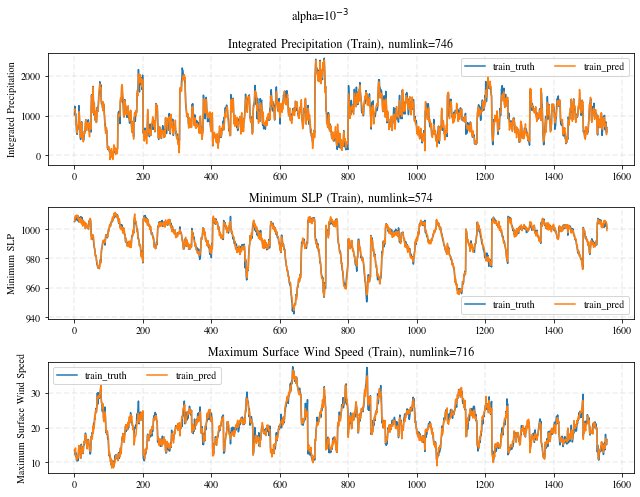

In [44]:
# 0.1
index = 3
alpha = [r'0.1','0.05','0.01','10$^{-3}$','10$^{-4}$','10$^{-5}$',\
                                '10$^{-6}$','10$^{-7}$','10$^{-8}$']
fig,ax = plt.subplots(3,1,figsize=(9,7))
ax[0].plot(precipdict[index]['y']['train'],label='train_truth')
ax[0].plot(precipdict[index]['mlr'].predict(precipdict[index]['X']['train']),label='train_pred')
#ax[0].set_xlabel('Time Samples')
ax[0].set_ylabel('Integrated Precipitation')
ax[0].legend(loc=1,ncol=2)
ax[0].grid(alpha=0.2,lw=1.5,ls='--')
ax[0].set_title(f'Integrated Precipitation (Train), numlink={len(lag_and_links[index][0])}')
plt.suptitle(f'alpha={alpha[index]}')

ax[1].plot(pmindict[index]['y']['train'],label='train_truth')
ax[1].plot(pmindict[index]['mlr'].predict(pmindict[index]['X']['train']),label='train_pred')
#ax[0].set_xlabel('Time Samples')
ax[1].set_ylabel('Minimum SLP')
ax[1].legend(loc=4,ncol=2)
ax[1].grid(alpha=0.2,lw=1.5,ls='--')
ax[1].set_title(f'Minimum SLP (Train), numlink={len(lag_and_links[index][1])}')

ax[2].plot(v10dict[index]['y']['train'],label='train_truth')
ax[2].plot(v10dict[index]['mlr'].predict(v10dict[index]['X']['train']),label='train_pred')
#ax[0].set_xlabel('Time Samples')
ax[2].set_ylabel('Maximum Surface Wind Speed')
ax[2].legend(loc=2,ncol=2)
ax[2].grid(alpha=0.2,lw=1.5,ls='--')
ax[2].set_title(f'Maximum Surface Wind Speed (Train), numlink={len(lag_and_links[index][2])}')
#plt.savefig('/home/saranya/Downloads/plots_output/integratedprecip_valid.png',dpi=400,facecolor='w')
plt.tight_layout()
plt.show()

NameError: name 'precipdict' is not defined

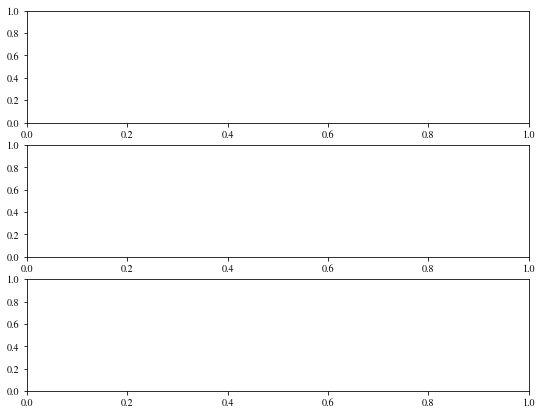

In [54]:
# 0.1
index = 3
alpha = [r'0.1','0.05','0.01','10$^{-3}$','10$^{-4}$','10$^{-5}$',\
                                '10$^{-6}$','10$^{-7}$','10$^{-8}$']
fig,ax = plt.subplots(3,1,figsize=(9,7))
ax[0].plot(precipdict[index]['y']['train'],label='train_truth')
ax[0].plot(precipdict[index]['mlr'].predict(precipdict[index]['X']['train']),label='train_pred')
#ax[0].set_xlabel('Time Samples')
ax[0].set_ylabel('Integrated Precipitation')
ax[0].legend(loc=1,ncol=2)
ax[0].grid(alpha=0.2,lw=1.5,ls='--')
ax[0].set_title(f'Integrated Precipitation (Train), numlink={len(lag_and_links[index][0])}')
plt.suptitle(f'alpha={alpha[index]}')

ax[1].plot(pmindict[index]['y']['train'],label='train_truth')
ax[1].plot(pmindict[index]['mlr'].predict(pmindict[index]['X']['train']),label='train_pred')
#ax[0].set_xlabel('Time Samples')
ax[1].set_ylabel('Minimum SLP')
ax[1].legend(loc=4,ncol=2)
ax[1].grid(alpha=0.2,lw=1.5,ls='--')
ax[1].set_title(f'Minimum SLP (Train), numlink={len(lag_and_links[index][1])}')

ax[2].plot(v10dict[index]['y']['train'],label='train_truth')
ax[2].plot(v10dict[index]['mlr'].predict(v10dict[index]['X']['train']),label='train_pred')
#ax[0].set_xlabel('Time Samples')
ax[2].set_ylabel('Maximum Surface Wind Speed')
ax[2].legend(loc=2,ncol=2)
ax[2].grid(alpha=0.2,lw=1.5,ls='--')
ax[2].set_title(f'Maximum Surface Wind Speed (Train), numlink={len(lag_and_links[index][2])}')
#plt.savefig('/home/saranya/Downloads/plots_output/integratedprecip_valid.png',dpi=400,facecolor='w')
plt.tight_layout()
plt.show()

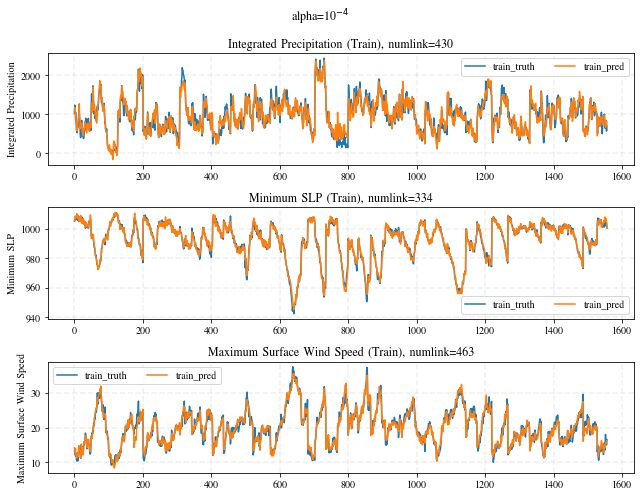

In [45]:

index = 4
alpha = [r'0.1','0.05','0.01','10$^{-3}$','10$^{-4}$','10$^{-5}$',\
                                '10$^{-6}$','10$^{-7}$','10$^{-8}$']
fig,ax = plt.subplots(3,1,figsize=(9,7))
ax[0].plot(precipdict[index]['y']['train'],label='train_truth')
ax[0].plot(precipdict[index]['mlr'].predict(precipdict[index]['X']['train']),label='train_pred')
#ax[0].set_xlabel('Time Samples')
ax[0].set_ylabel('Integrated Precipitation')
ax[0].legend(loc=1,ncol=2)
ax[0].grid(alpha=0.2,lw=1.5,ls='--')
ax[0].set_title(f'Integrated Precipitation (Train), numlink={len(lag_and_links[index][0])}')
plt.suptitle(f'alpha={alpha[index]}')

ax[1].plot(pmindict[index]['y']['train'],label='train_truth')
ax[1].plot(pmindict[index]['mlr'].predict(pmindict[index]['X']['train']),label='train_pred')
#ax[0].set_xlabel('Time Samples')
ax[1].set_ylabel('Minimum SLP')
ax[1].legend(loc=4,ncol=2)
ax[1].grid(alpha=0.2,lw=1.5,ls='--')
ax[1].set_title(f'Minimum SLP (Train), numlink={len(lag_and_links[index][1])}')

ax[2].plot(v10dict[index]['y']['train'],label='train_truth')
ax[2].plot(v10dict[index]['mlr'].predict(v10dict[index]['X']['train']),label='train_pred')
#ax[0].set_xlabel('Time Samples')
ax[2].set_ylabel('Maximum Surface Wind Speed')
ax[2].legend(loc=2,ncol=2)
ax[2].grid(alpha=0.2,lw=1.5,ls='--')
ax[2].set_title(f'Maximum Surface Wind Speed (Train), numlink={len(lag_and_links[index][2])}')
#plt.savefig('/home/saranya/Downloads/plots_output/integratedprecip_valid.png',dpi=400,facecolor='w')
plt.tight_layout()
plt.show()

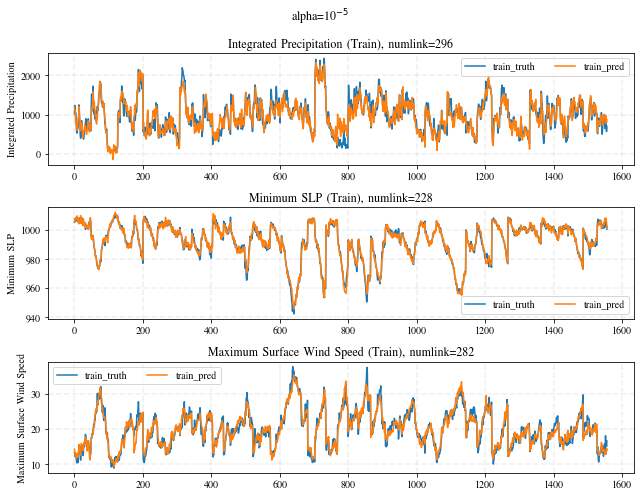

In [48]:

index = 5
alpha = [r'0.1','0.05','0.01','10$^{-3}$','10$^{-4}$','10$^{-5}$',\
                                '10$^{-6}$','10$^{-7}$','10$^{-8}$']
fig,ax = plt.subplots(3,1,figsize=(9,7))
ax[0].plot(precipdict[index]['y']['train'],label='train_truth')
ax[0].plot(precipdict[index]['mlr'].predict(precipdict[index]['X']['train']),label='train_pred')
#ax[0].set_xlabel('Time Samples')
ax[0].set_ylabel('Integrated Precipitation')
ax[0].legend(loc=1,ncol=2)
ax[0].grid(alpha=0.2,lw=1.5,ls='--')
ax[0].set_title(f'Integrated Precipitation (Train), numlink={len(lag_and_links[index][0])}')
plt.suptitle(f'alpha={alpha[index]}')

ax[1].plot(pmindict[index]['y']['train'],label='train_truth')
ax[1].plot(pmindict[index]['mlr'].predict(pmindict[index]['X']['train']),label='train_pred')
#ax[0].set_xlabel('Time Samples')
ax[1].set_ylabel('Minimum SLP')
ax[1].legend(loc=4,ncol=2)
ax[1].grid(alpha=0.2,lw=1.5,ls='--')
ax[1].set_title(f'Minimum SLP (Train), numlink={len(lag_and_links[index][1])}')

ax[2].plot(v10dict[index]['y']['train'],label='train_truth')
ax[2].plot(v10dict[index]['mlr'].predict(v10dict[index]['X']['train']),label='train_pred')
#ax[0].set_xlabel('Time Samples')
ax[2].set_ylabel('Maximum Surface Wind Speed')
ax[2].legend(loc=2,ncol=2)
ax[2].grid(alpha=0.2,lw=1.5,ls='--')
ax[2].set_title(f'Maximum Surface Wind Speed (Train), numlink={len(lag_and_links[index][2])}')
#plt.savefig('/home/saranya/Downloads/plots_output/integratedprecip_valid.png',dpi=400,facecolor='w')
plt.tight_layout()
plt.show()

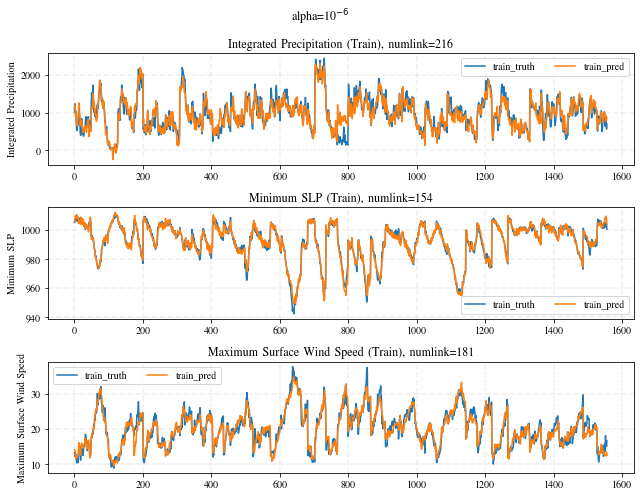

In [49]:

index = 6
alpha = [r'0.1','0.05','0.01','10$^{-3}$','10$^{-4}$','10$^{-5}$',\
                                '10$^{-6}$','10$^{-7}$','10$^{-8}$']
fig,ax = plt.subplots(3,1,figsize=(9,7))
ax[0].plot(precipdict[index]['y']['train'],label='train_truth')
ax[0].plot(precipdict[index]['mlr'].predict(precipdict[index]['X']['train']),label='train_pred')
#ax[0].set_xlabel('Time Samples')
ax[0].set_ylabel('Integrated Precipitation')
ax[0].legend(loc=1,ncol=2)
ax[0].grid(alpha=0.2,lw=1.5,ls='--')
ax[0].set_title(f'Integrated Precipitation (Train), numlink={len(lag_and_links[index][0])}')
plt.suptitle(f'alpha={alpha[index]}')

ax[1].plot(pmindict[index]['y']['train'],label='train_truth')
ax[1].plot(pmindict[index]['mlr'].predict(pmindict[index]['X']['train']),label='train_pred')
#ax[0].set_xlabel('Time Samples')
ax[1].set_ylabel('Minimum SLP')
ax[1].legend(loc=4,ncol=2)
ax[1].grid(alpha=0.2,lw=1.5,ls='--')
ax[1].set_title(f'Minimum SLP (Train), numlink={len(lag_and_links[index][1])}')

ax[2].plot(v10dict[index]['y']['train'],label='train_truth')
ax[2].plot(v10dict[index]['mlr'].predict(v10dict[index]['X']['train']),label='train_pred')
#ax[0].set_xlabel('Time Samples')
ax[2].set_ylabel('Maximum Surface Wind Speed')
ax[2].legend(loc=2,ncol=2)
ax[2].grid(alpha=0.2,lw=1.5,ls='--')
ax[2].set_title(f'Maximum Surface Wind Speed (Train), numlink={len(lag_and_links[index][2])}')
#plt.savefig('/home/saranya/Downloads/plots_output/integratedprecip_valid.png',dpi=400,facecolor='w')
plt.tight_layout()
plt.show()

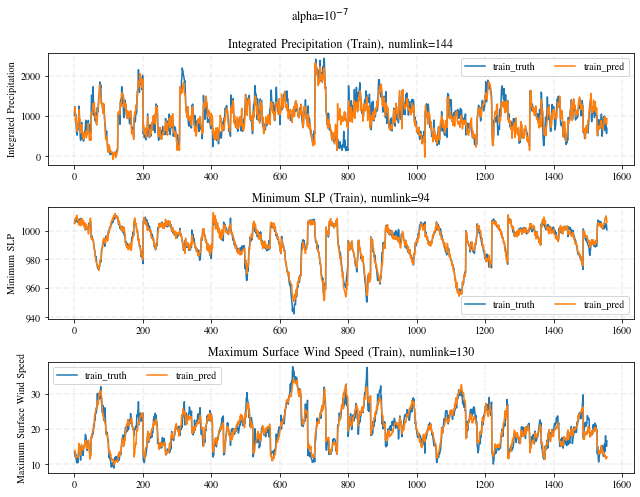

In [50]:

index = 7
alpha = [r'0.1','0.05','0.01','10$^{-3}$','10$^{-4}$','10$^{-5}$',\
                                '10$^{-6}$','10$^{-7}$','10$^{-8}$']
fig,ax = plt.subplots(3,1,figsize=(9,7))
ax[0].plot(precipdict[index]['y']['train'],label='train_truth')
ax[0].plot(precipdict[index]['mlr'].predict(precipdict[index]['X']['train']),label='train_pred')
#ax[0].set_xlabel('Time Samples')
ax[0].set_ylabel('Integrated Precipitation')
ax[0].legend(loc=1,ncol=2)
ax[0].grid(alpha=0.2,lw=1.5,ls='--')
ax[0].set_title(f'Integrated Precipitation (Train), numlink={len(lag_and_links[index][0])}')
plt.suptitle(f'alpha={alpha[index]}')

ax[1].plot(pmindict[index]['y']['train'],label='train_truth')
ax[1].plot(pmindict[index]['mlr'].predict(pmindict[index]['X']['train']),label='train_pred')
#ax[0].set_xlabel('Time Samples')
ax[1].set_ylabel('Minimum SLP')
ax[1].legend(loc=4,ncol=2)
ax[1].grid(alpha=0.2,lw=1.5,ls='--')
ax[1].set_title(f'Minimum SLP (Train), numlink={len(lag_and_links[index][1])}')

ax[2].plot(v10dict[index]['y']['train'],label='train_truth')
ax[2].plot(v10dict[index]['mlr'].predict(v10dict[index]['X']['train']),label='train_pred')
#ax[0].set_xlabel('Time Samples')
ax[2].set_ylabel('Maximum Surface Wind Speed')
ax[2].legend(loc=2,ncol=2)
ax[2].grid(alpha=0.2,lw=1.5,ls='--')
ax[2].set_title(f'Maximum Surface Wind Speed (Train), numlink={len(lag_and_links[index][2])}')
#plt.savefig('/home/saranya/Downloads/plots_output/integratedprecip_valid.png',dpi=400,facecolor='w')
plt.tight_layout()
plt.show()

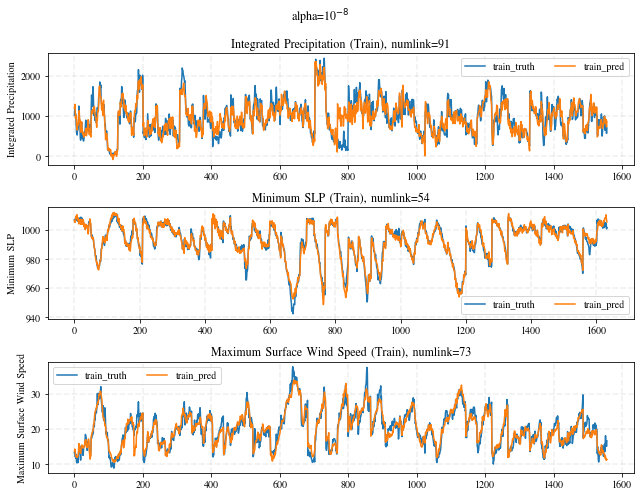

In [51]:

index = 8
alpha = [r'0.1','0.05','0.01','10$^{-3}$','10$^{-4}$','10$^{-5}$',\
                                '10$^{-6}$','10$^{-7}$','10$^{-8}$']
fig,ax = plt.subplots(3,1,figsize=(9,7))
ax[0].plot(precipdict[index]['y']['train'],label='train_truth')
ax[0].plot(precipdict[index]['mlr'].predict(precipdict[index]['X']['train']),label='train_pred')
#ax[0].set_xlabel('Time Samples')
ax[0].set_ylabel('Integrated Precipitation')
ax[0].legend(loc=1,ncol=2)
ax[0].grid(alpha=0.2,lw=1.5,ls='--')
ax[0].set_title(f'Integrated Precipitation (Train), numlink={len(lag_and_links[index][0])}')
plt.suptitle(f'alpha={alpha[index]}')

ax[1].plot(pmindict[index]['y']['train'],label='train_truth')
ax[1].plot(pmindict[index]['mlr'].predict(pmindict[index]['X']['train']),label='train_pred')
#ax[0].set_xlabel('Time Samples')
ax[1].set_ylabel('Minimum SLP')
ax[1].legend(loc=4,ncol=2)
ax[1].grid(alpha=0.2,lw=1.5,ls='--')
ax[1].set_title(f'Minimum SLP (Train), numlink={len(lag_and_links[index][1])}')

ax[2].plot(v10dict[index]['y']['train'],label='train_truth')
ax[2].plot(v10dict[index]['mlr'].predict(v10dict[index]['X']['train']),label='train_pred')
#ax[0].set_xlabel('Time Samples')
ax[2].set_ylabel('Maximum Surface Wind Speed')
ax[2].legend(loc=2,ncol=2)
ax[2].grid(alpha=0.2,lw=1.5,ls='--')
ax[2].set_title(f'Maximum Surface Wind Speed (Train), numlink={len(lag_and_links[index][2])}')
#plt.savefig('/home/saranya/Downloads/plots_output/integratedprecip_valid.png',dpi=400,facecolor='w')
plt.tight_layout()
plt.show()

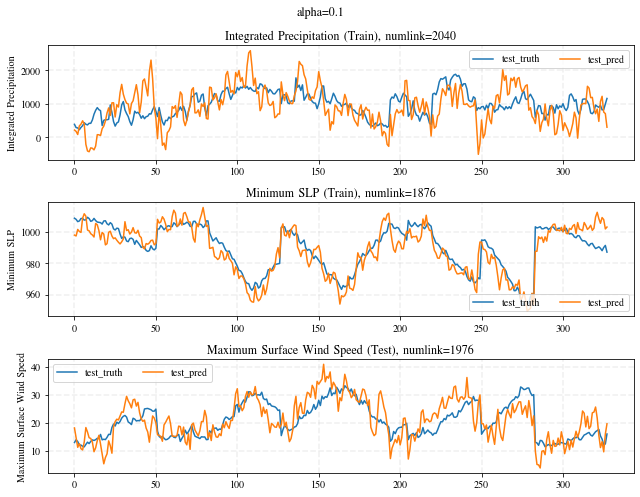

In [47]:
index = 0
alpha = [r'0.1','0.05','0.01','10$^{-3}$','10$^{-4}$','10$^{-5}$',\
                                '10$^{-6}$','10$^{-7}$','10$^{-8}$']
fig,ax = plt.subplots(3,1,figsize=(9,7))
ax[0].plot(precipdict[index]['y']['test'],label='test_truth')
ax[0].plot(precipdict[index]['mlr'].predict(precipdict[index]['X']['test']),label='test_pred')
#ax[0].set_xlabel('Time Samples')
ax[0].set_ylabel('Integrated Precipitation')
ax[0].legend(loc=1,ncol=2)
ax[0].grid(alpha=0.2,lw=1.5,ls='--')
ax[0].set_title(f'Integrated Precipitation (Train), numlink={len(lag_and_links[index][0])}')
plt.suptitle(f'alpha={alpha[index]}')

ax[1].plot(pmindict[index]['y']['test'],label='test_truth')
ax[1].plot(pmindict[index]['mlr'].predict(pmindict[index]['X']['test']),label='test_pred')
#ax[0].set_xlabel('Time Samples')
ax[1].set_ylabel('Minimum SLP')
ax[1].legend(loc=4,ncol=2)
ax[1].grid(alpha=0.2,lw=1.5,ls='--')
ax[1].set_title(f'Minimum SLP (Train), numlink={len(lag_and_links[index][1])}')

ax[2].plot(v10dict[index]['y']['test'],label='test_truth')
ax[2].plot(v10dict[index]['mlr'].predict(v10dict[index]['X']['test']),label='test_pred')
#ax[0].set_xlabel('Time Samples')
ax[2].set_ylabel('Maximum Surface Wind Speed')
ax[2].legend(loc=2,ncol=2)
ax[2].grid(alpha=0.2,lw=1.5,ls='--')
ax[2].set_title(f'Maximum Surface Wind Speed (Test), numlink={len(lag_and_links[index][2])}')
#plt.savefig('/home/saranya/Downloads/plots_output/integratedprecip_valid.png',dpi=400,facecolor='w')
plt.tight_layout()
plt.show()

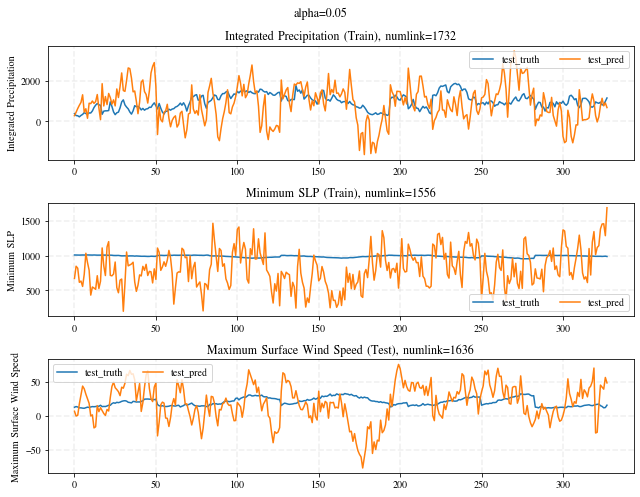

<Figure size 432x288 with 0 Axes>

In [38]:
index = 1
alpha = [r'0.1','0.05','0.01','10$^{-3}$','10$^{-4}$','10$^{-5}$',\
                                '10$^{-6}$','10$^{-7}$','10$^{-8}$']
fig,ax = plt.subplots(3,1,figsize=(9,7))
ax[0].plot(precipdict[index]['y']['test'],label='test_truth')
ax[0].plot(precipdict[index]['mlr'].predict(precipdict[index]['X']['test']),label='test_pred')
#ax[0].set_xlabel('Time Samples')
ax[0].set_ylabel('Integrated Precipitation')
ax[0].legend(loc=1,ncol=2)
ax[0].grid(alpha=0.2,lw=1.5,ls='--')
ax[0].set_title(f'Integrated Precipitation (Train), numlink={len(lag_and_links[index][0])}')
plt.suptitle(f'alpha={alpha[index]}')

ax[1].plot(pmindict[index]['y']['test'],label='test_truth')
ax[1].plot(pmindict[index]['mlr'].predict(pmindict[index]['X']['test']),label='test_pred')
#ax[0].set_xlabel('Time Samples')
ax[1].set_ylabel('Minimum SLP')
ax[1].legend(loc=4,ncol=2)
ax[1].grid(alpha=0.2,lw=1.5,ls='--')
ax[1].set_title(f'Minimum SLP (Train), numlink={len(lag_and_links[index][1])}')

ax[2].plot(v10dict[index]['y']['test'],label='test_truth')
ax[2].plot(v10dict[index]['mlr'].predict(v10dict[index]['X']['test']),label='test_pred')
#ax[0].set_xlabel('Time Samples')
ax[2].set_ylabel('Maximum Surface Wind Speed')
ax[2].legend(loc=2,ncol=2)
ax[2].grid(alpha=0.2,lw=1.5,ls='--')
ax[2].set_title(f'Maximum Surface Wind Speed (Test), numlink={len(lag_and_links[index][2])}')
#plt.savefig('/home/saranya/Downloads/plots_output/integratedprecip_valid.png',dpi=400,facecolor='w')
plt.tight_layout()
plt.show()
ax[2].legend(loc=2,ncol=2)
ax[2].grid(alpha=0.2,lw=1.5,ls='--')
ax[2].set_title('Maximum Surface Wind Speed (test)')
#plt.savefig('/home/saranya/Downloads/plots_output/integratedprecip_valid.png',dpi=400,facecolor='w')
plt.tight_layout()
plt.show()

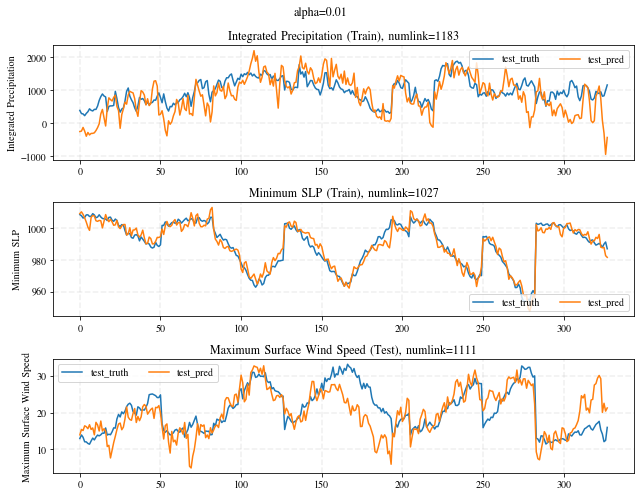

<Figure size 432x288 with 0 Axes>

In [39]:
index = 2
alpha = [r'0.1','0.05','0.01','10$^{-3}$','10$^{-4}$','10$^{-5}$',\
                                '10$^{-6}$','10$^{-7}$','10$^{-8}$']
fig,ax = plt.subplots(3,1,figsize=(9,7))
ax[0].plot(precipdict[index]['y']['test'],label='test_truth')
ax[0].plot(precipdict[index]['mlr'].predict(precipdict[index]['X']['test']),label='test_pred')
#ax[0].set_xlabel('Time Samples')
ax[0].set_ylabel('Integrated Precipitation')
ax[0].legend(loc=1,ncol=2)
ax[0].grid(alpha=0.2,lw=1.5,ls='--')
ax[0].set_title(f'Integrated Precipitation (Train), numlink={len(lag_and_links[index][0])}')
plt.suptitle(f'alpha={alpha[index]}')

ax[1].plot(pmindict[index]['y']['test'],label='test_truth')
ax[1].plot(pmindict[index]['mlr'].predict(pmindict[index]['X']['test']),label='test_pred')
#ax[0].set_xlabel('Time Samples')
ax[1].set_ylabel('Minimum SLP')
ax[1].legend(loc=4,ncol=2)
ax[1].grid(alpha=0.2,lw=1.5,ls='--')
ax[1].set_title(f'Minimum SLP (Train), numlink={len(lag_and_links[index][1])}')

ax[2].plot(v10dict[index]['y']['test'],label='test_truth')
ax[2].plot(v10dict[index]['mlr'].predict(v10dict[index]['X']['test']),label='test_pred')
#ax[0].set_xlabel('Time Samples')
ax[2].set_ylabel('Maximum Surface Wind Speed')
ax[2].legend(loc=2,ncol=2)
ax[2].grid(alpha=0.2,lw=1.5,ls='--')
ax[2].set_title(f'Maximum Surface Wind Speed (Test), numlink={len(lag_and_links[index][2])}')
#plt.savefig('/home/saranya/Downloads/plots_output/integratedprecip_valid.png',dpi=400,facecolor='w')
plt.tight_layout()
plt.show()
ax[2].legend(loc=2,ncol=2)
ax[2].grid(alpha=0.2,lw=1.5,ls='--')
ax[2].set_title('Maximum Surface Wind Speed (test)')
#plt.savefig('/home/saranya/Downloads/plots_output/integratedprecip_valid.png',dpi=400,facecolor='w')
plt.tight_layout()
plt.show()

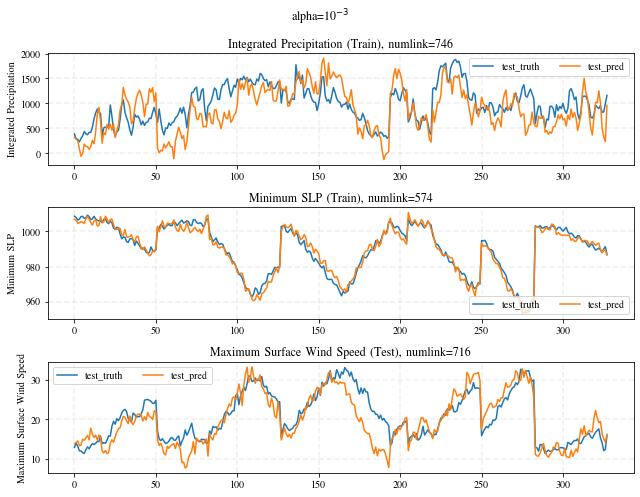

<Figure size 432x288 with 0 Axes>

In [40]:
index = 3
alpha = [r'0.1','0.05','0.01','10$^{-3}$','10$^{-4}$','10$^{-5}$',\
                                '10$^{-6}$','10$^{-7}$','10$^{-8}$']
fig,ax = plt.subplots(3,1,figsize=(9,7))
ax[0].plot(precipdict[index]['y']['test'],label='test_truth')
ax[0].plot(precipdict[index]['mlr'].predict(precipdict[index]['X']['test']),label='test_pred')
#ax[0].set_xlabel('Time Samples')
ax[0].set_ylabel('Integrated Precipitation')
ax[0].legend(loc=1,ncol=2)
ax[0].grid(alpha=0.2,lw=1.5,ls='--')
ax[0].set_title(f'Integrated Precipitation (Train), numlink={len(lag_and_links[index][0])}')
plt.suptitle(f'alpha={alpha[index]}')

ax[1].plot(pmindict[index]['y']['test'],label='test_truth')
ax[1].plot(pmindict[index]['mlr'].predict(pmindict[index]['X']['test']),label='test_pred')
#ax[0].set_xlabel('Time Samples')
ax[1].set_ylabel('Minimum SLP')
ax[1].legend(loc=4,ncol=2)
ax[1].grid(alpha=0.2,lw=1.5,ls='--')
ax[1].set_title(f'Minimum SLP (Train), numlink={len(lag_and_links[index][1])}')

ax[2].plot(v10dict[index]['y']['test'],label='test_truth')
ax[2].plot(v10dict[index]['mlr'].predict(v10dict[index]['X']['test']),label='test_pred')
#ax[0].set_xlabel('Time Samples')
ax[2].set_ylabel('Maximum Surface Wind Speed')
ax[2].legend(loc=2,ncol=2)
ax[2].grid(alpha=0.2,lw=1.5,ls='--')
ax[2].set_title(f'Maximum Surface Wind Speed (Test), numlink={len(lag_and_links[index][2])}')
#plt.savefig('/home/saranya/Downloads/plots_output/integratedprecip_valid.png',dpi=400,facecolor='w')
plt.tight_layout()
plt.show()
ax[2].legend(loc=2,ncol=2)
ax[2].grid(alpha=0.2,lw=1.5,ls='--')
ax[2].set_title('Maximum Surface Wind Speed (test)')
#plt.savefig('/home/saranya/Downloads/plots_output/integratedprecip_valid.png',dpi=400,facecolor='w')
plt.tight_layout()
plt.show()

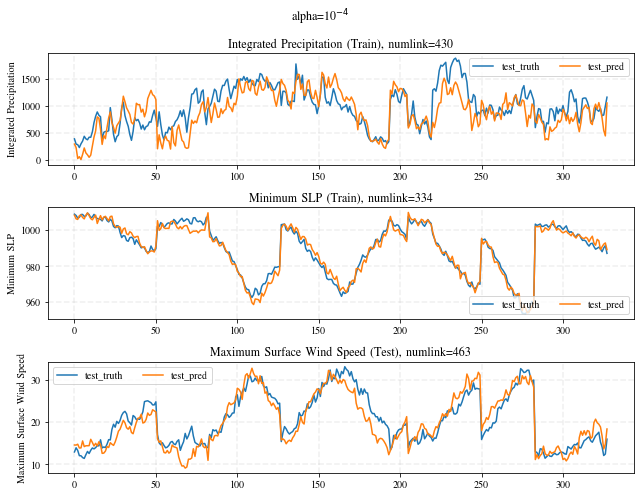

<Figure size 432x288 with 0 Axes>

In [32]:
index = 4
alpha = [r'0.1','0.05','0.01','10$^{-3}$','10$^{-4}$','10$^{-5}$',\
                                '10$^{-6}$','10$^{-7}$','10$^{-8}$']
fig,ax = plt.subplots(3,1,figsize=(9,7))
ax[0].plot(precipdict[index]['y']['test'],label='test_truth')
ax[0].plot(precipdict[index]['mlr'].predict(precipdict[index]['X']['test']),label='test_pred')
#ax[0].set_xlabel('Time Samples')
ax[0].set_ylabel('Integrated Precipitation')
ax[0].legend(loc=1,ncol=2)
ax[0].grid(alpha=0.2,lw=1.5,ls='--')
ax[0].set_title(f'Integrated Precipitation (Train), numlink={len(lag_and_links[index][0])}')
plt.suptitle(f'alpha={alpha[index]}')

ax[1].plot(pmindict[index]['y']['test'],label='test_truth')
ax[1].plot(pmindict[index]['mlr'].predict(pmindict[index]['X']['test']),label='test_pred')
#ax[0].set_xlabel('Time Samples')
ax[1].set_ylabel('Minimum SLP')
ax[1].legend(loc=4,ncol=2)
ax[1].grid(alpha=0.2,lw=1.5,ls='--')
ax[1].set_title(f'Minimum SLP (Train), numlink={len(lag_and_links[index][1])}')

ax[2].plot(v10dict[index]['y']['test'],label='test_truth')
ax[2].plot(v10dict[index]['mlr'].predict(v10dict[index]['X']['test']),label='test_pred')
#ax[0].set_xlabel('Time Samples')
ax[2].set_ylabel('Maximum Surface Wind Speed')
ax[2].legend(loc=2,ncol=2)
ax[2].grid(alpha=0.2,lw=1.5,ls='--')
ax[2].set_title(f'Maximum Surface Wind Speed (Test), numlink={len(lag_and_links[index][2])}')
#plt.savefig('/home/saranya/Downloads/plots_output/integratedprecip_valid.png',dpi=400,facecolor='w')
plt.tight_layout()
plt.show()
ax[2].legend(loc=2,ncol=2)
ax[2].grid(alpha=0.2,lw=1.5,ls='--')
ax[2].set_title('Maximum Surface Wind Speed (test)')
#plt.savefig('/home/saranya/Downloads/plots_output/integratedprecip_valid.png',dpi=400,facecolor='w')
plt.tight_layout()
plt.show()

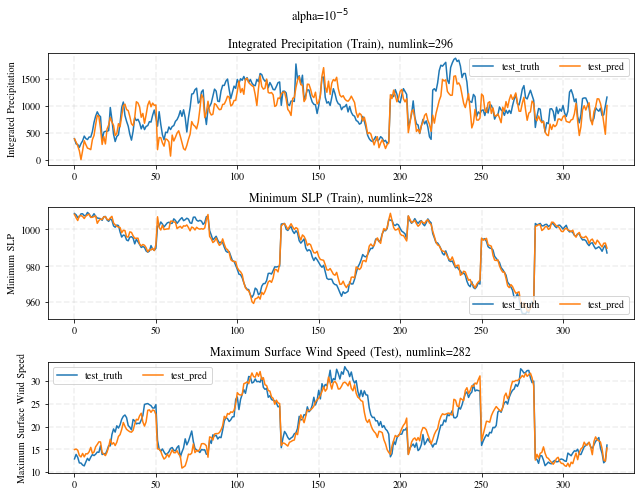

<Figure size 432x288 with 0 Axes>

In [35]:
index = 5
alpha = [r'0.1','0.05','0.01','10$^{-3}$','10$^{-4}$','10$^{-5}$',\
                                '10$^{-6}$','10$^{-7}$','10$^{-8}$']
fig,ax = plt.subplots(3,1,figsize=(9,7))
ax[0].plot(precipdict[index]['y']['test'],label='test_truth')
ax[0].plot(precipdict[index]['mlr'].predict(precipdict[index]['X']['test']),label='test_pred')
#ax[0].set_xlabel('Time Samples')
ax[0].set_ylabel('Integrated Precipitation')
ax[0].legend(loc=1,ncol=2)
ax[0].grid(alpha=0.2,lw=1.5,ls='--')
ax[0].set_title(f'Integrated Precipitation (Train), numlink={len(lag_and_links[index][0])}')
plt.suptitle(f'alpha={alpha[index]}')

ax[1].plot(pmindict[index]['y']['test'],label='test_truth')
ax[1].plot(pmindict[index]['mlr'].predict(pmindict[index]['X']['test']),label='test_pred')
#ax[0].set_xlabel('Time Samples')
ax[1].set_ylabel('Minimum SLP')
ax[1].legend(loc=4,ncol=2)
ax[1].grid(alpha=0.2,lw=1.5,ls='--')
ax[1].set_title(f'Minimum SLP (Train), numlink={len(lag_and_links[index][1])}')

ax[2].plot(v10dict[index]['y']['test'],label='test_truth')
ax[2].plot(v10dict[index]['mlr'].predict(v10dict[index]['X']['test']),label='test_pred')
#ax[0].set_xlabel('Time Samples')
ax[2].set_ylabel('Maximum Surface Wind Speed')
ax[2].legend(loc=2,ncol=2)
ax[2].grid(alpha=0.2,lw=1.5,ls='--')
ax[2].set_title(f'Maximum Surface Wind Speed (Test), numlink={len(lag_and_links[index][2])}')
#plt.savefig('/home/saranya/Downloads/plots_output/integratedprecip_valid.png',dpi=400,facecolor='w')
plt.tight_layout()
plt.show()
ax[2].legend(loc=2,ncol=2)
ax[2].grid(alpha=0.2,lw=1.5,ls='--')
ax[2].set_title('Maximum Surface Wind Speed (test)')
#plt.savefig('/home/saranya/Downloads/plots_output/integratedprecip_valid.png',dpi=400,facecolor='w')
plt.tight_layout()
plt.show()

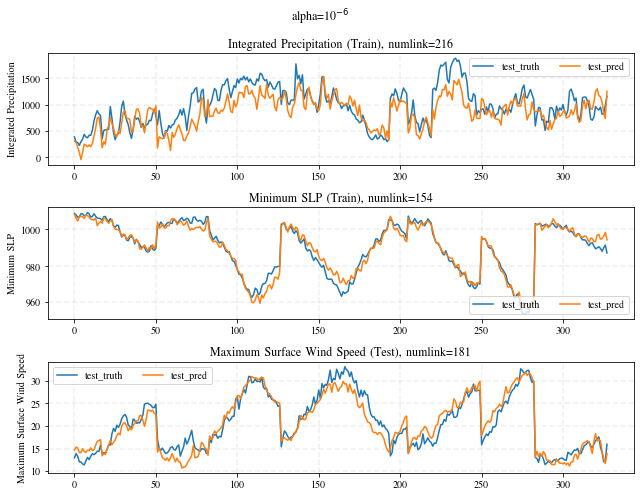

<Figure size 432x288 with 0 Axes>

In [36]:
index = 6
alpha = [r'0.1','0.05','0.01','10$^{-3}$','10$^{-4}$','10$^{-5}$',\
                                '10$^{-6}$','10$^{-7}$','10$^{-8}$']
fig,ax = plt.subplots(3,1,figsize=(9,7))
ax[0].plot(precipdict[index]['y']['test'],label='test_truth')
ax[0].plot(precipdict[index]['mlr'].predict(precipdict[index]['X']['test']),label='test_pred')
#ax[0].set_xlabel('Time Samples')
ax[0].set_ylabel('Integrated Precipitation')
ax[0].legend(loc=1,ncol=2)
ax[0].grid(alpha=0.2,lw=1.5,ls='--')
ax[0].set_title(f'Integrated Precipitation (Train), numlink={len(lag_and_links[index][0])}')
plt.suptitle(f'alpha={alpha[index]}')

ax[1].plot(pmindict[index]['y']['test'],label='test_truth')
ax[1].plot(pmindict[index]['mlr'].predict(pmindict[index]['X']['test']),label='test_pred')
#ax[0].set_xlabel('Time Samples')
ax[1].set_ylabel('Minimum SLP')
ax[1].legend(loc=4,ncol=2)
ax[1].grid(alpha=0.2,lw=1.5,ls='--')
ax[1].set_title(f'Minimum SLP (Train), numlink={len(lag_and_links[index][1])}')

ax[2].plot(v10dict[index]['y']['test'],label='test_truth')
ax[2].plot(v10dict[index]['mlr'].predict(v10dict[index]['X']['test']),label='test_pred')
#ax[0].set_xlabel('Time Samples')
ax[2].set_ylabel('Maximum Surface Wind Speed')
ax[2].legend(loc=2,ncol=2)
ax[2].grid(alpha=0.2,lw=1.5,ls='--')
ax[2].set_title(f'Maximum Surface Wind Speed (Test), numlink={len(lag_and_links[index][2])}')
#plt.savefig('/home/saranya/Downloads/plots_output/integratedprecip_valid.png',dpi=400,facecolor='w')
plt.tight_layout()
plt.show()
ax[2].legend(loc=2,ncol=2)
ax[2].grid(alpha=0.2,lw=1.5,ls='--')
ax[2].set_title('Maximum Surface Wind Speed (test)')
#plt.savefig('/home/saranya/Downloads/plots_output/integratedprecip_valid.png',dpi=400,facecolor='w')
plt.tight_layout()
plt.show()

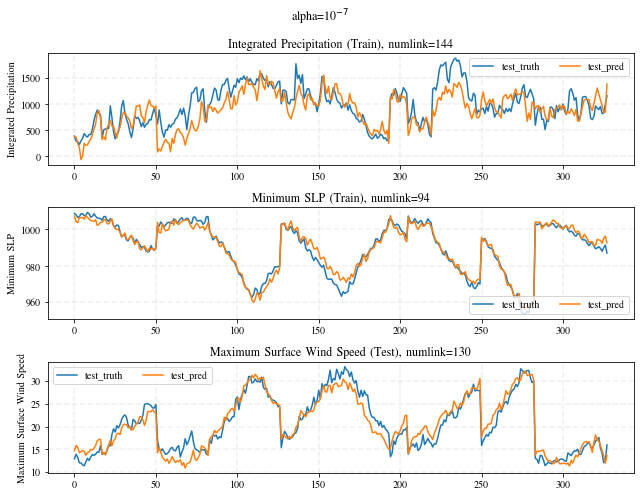

<Figure size 432x288 with 0 Axes>

In [37]:
index = 7
alpha = [r'0.1','0.05','0.01','10$^{-3}$','10$^{-4}$','10$^{-5}$',\
                                '10$^{-6}$','10$^{-7}$','10$^{-8}$']
fig,ax = plt.subplots(3,1,figsize=(9,7))
ax[0].plot(precipdict[index]['y']['test'],label='test_truth')
ax[0].plot(precipdict[index]['mlr'].predict(precipdict[index]['X']['test']),label='test_pred')
#ax[0].set_xlabel('Time Samples')
ax[0].set_ylabel('Integrated Precipitation')
ax[0].legend(loc=1,ncol=2)
ax[0].grid(alpha=0.2,lw=1.5,ls='--')
ax[0].set_title(f'Integrated Precipitation (Train), numlink={len(lag_and_links[index][0])}')
plt.suptitle(f'alpha={alpha[index]}')

ax[1].plot(pmindict[index]['y']['test'],label='test_truth')
ax[1].plot(pmindict[index]['mlr'].predict(pmindict[index]['X']['test']),label='test_pred')
#ax[0].set_xlabel('Time Samples')
ax[1].set_ylabel('Minimum SLP')
ax[1].legend(loc=4,ncol=2)
ax[1].grid(alpha=0.2,lw=1.5,ls='--')
ax[1].set_title(f'Minimum SLP (Train), numlink={len(lag_and_links[index][1])}')

ax[2].plot(v10dict[index]['y']['test'],label='test_truth')
ax[2].plot(v10dict[index]['mlr'].predict(v10dict[index]['X']['test']),label='test_pred')
#ax[0].set_xlabel('Time Samples')
ax[2].set_ylabel('Maximum Surface Wind Speed')
ax[2].legend(loc=2,ncol=2)
ax[2].grid(alpha=0.2,lw=1.5,ls='--')
ax[2].set_title(f'Maximum Surface Wind Speed (Test), numlink={len(lag_and_links[index][2])}')
#plt.savefig('/home/saranya/Downloads/plots_output/integratedprecip_valid.png',dpi=400,facecolor='w')
plt.tight_layout()
plt.show()
ax[2].legend(loc=2,ncol=2)
ax[2].grid(alpha=0.2,lw=1.5,ls='--')
ax[2].set_title('Maximum Surface Wind Speed (test)')
#plt.savefig('/home/saranya/Downloads/plots_output/integratedprecip_valid.png',dpi=400,facecolor='w')
plt.tight_layout()
plt.show()

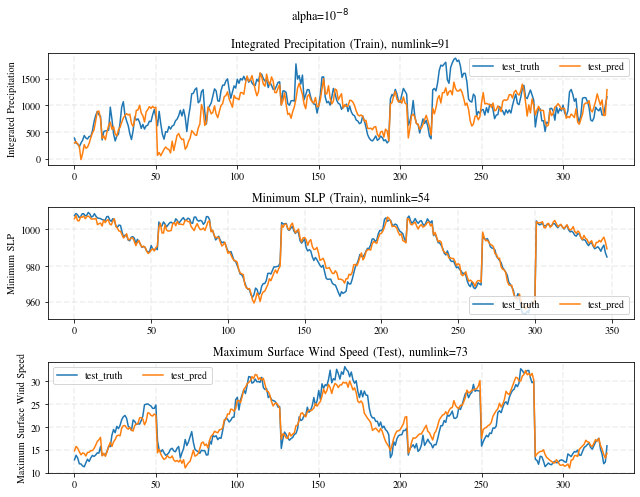

<Figure size 432x288 with 0 Axes>

In [34]:
index = 8
alpha = [r'0.1','0.05','0.01','10$^{-3}$','10$^{-4}$','10$^{-5}$',\
                                '10$^{-6}$','10$^{-7}$','10$^{-8}$']
fig,ax = plt.subplots(3,1,figsize=(9,7))
ax[0].plot(precipdict[index]['y']['test'],label='test_truth')
ax[0].plot(precipdict[index]['mlr'].predict(precipdict[index]['X']['test']),label='test_pred')
#ax[0].set_xlabel('Time Samples')
ax[0].set_ylabel('Integrated Precipitation')
ax[0].legend(loc=1,ncol=2)
ax[0].grid(alpha=0.2,lw=1.5,ls='--')
ax[0].set_title(f'Integrated Precipitation (Train), numlink={len(lag_and_links[index][0])}')
plt.suptitle(f'alpha={alpha[index]}')

ax[1].plot(pmindict[index]['y']['test'],label='test_truth')
ax[1].plot(pmindict[index]['mlr'].predict(pmindict[index]['X']['test']),label='test_pred')
#ax[0].set_xlabel('Time Samples')
ax[1].set_ylabel('Minimum SLP')
ax[1].legend(loc=4,ncol=2)
ax[1].grid(alpha=0.2,lw=1.5,ls='--')
ax[1].set_title(f'Minimum SLP (Train), numlink={len(lag_and_links[index][1])}')

ax[2].plot(v10dict[index]['y']['test'],label='test_truth')
ax[2].plot(v10dict[index]['mlr'].predict(v10dict[index]['X']['test']),label='test_pred')
#ax[0].set_xlabel('Time Samples')
ax[2].set_ylabel('Maximum Surface Wind Speed')
ax[2].legend(loc=2,ncol=2)
ax[2].grid(alpha=0.2,lw=1.5,ls='--')
ax[2].set_title(f'Maximum Surface Wind Speed (Test), numlink={len(lag_and_links[index][2])}')
#plt.savefig('/home/saranya/Downloads/plots_output/integratedprecip_valid.png',dpi=400,facecolor='w')
plt.tight_layout()
plt.show()
ax[2].legend(loc=2,ncol=2)
ax[2].grid(alpha=0.2,lw=1.5,ls='--')
ax[2].set_title('Maximum Surface Wind Speed (test)')
#plt.savefig('/home/saranya/Downloads/plots_output/integratedprecip_valid.png',dpi=400,facecolor='w')
plt.tight_layout()
plt.show()